### Problem Statement
#### The airline industry continuously suffers from vast, complicated scheduling problems. On the one hand, it is hard to find a model that delivers the optimal assignments of airplanes and airlines to terminal slots. This can be considered a prescriptive analytics exercise. On the other hand, however, it can leverage the data from past flights, airlines and airports can make their operations more robust by learning models that are able to predict delays and cancellations. In this project, you will do both: you will create a model that predicts whether a flight will be cancelled or not (classification), and if it flights, how long the delay might be (regression).

In [1]:
## Preprocessing on the raw data
##data source: http://stat-computing.org/dataexpo/2009/the-data.html. Airlines considered - Continental Airlines(CO) and Mesa Airlines(YV)

In [243]:
import pandas as pd

df06 = pd.read_csv('2006.csv', encoding = 'latin1')
df07 = pd.read_csv('2007.csv', encoding = 'latin1')
df08 = pd.read_csv('2008.csv', encoding = 'latin1')

print(df06.shape)
print(df07.shape)
print(df08.shape)

(7141922, 29)
(7453215, 29)
(7009728, 29)


In [244]:
#filter for CO and YV only
df06 = df06.query("UniqueCarrier == 'CO' | UniqueCarrier == 'YV'")
df07 = df07.query("UniqueCarrier == 'CO' | UniqueCarrier == 'YV'")
df08 = df08.query("UniqueCarrier == 'CO' | UniqueCarrier == 'YV'")
print(df06.shape)
print(df07.shape)
print(df08.shape)

(614153, 29)
(617513, 29)
(553385, 29)


In [245]:
df06.reset_index()
df07.reset_index()
df08.reset_index()

,index,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,129113,2008,1,1,2,2036.0,1741,2128.0,1856,YV,...,5.0,6.0,0,NaN,0,0.0,0.0,152.0,0.0,0.0
1,129114,2008,1,1,2,1447.0,1230,1553.0,1347,YV,...,5.0,7.0,0,NaN,0,0.0,0.0,0.0,0.0,126.0
2,129115,2008,1,1,2,1514.0,1522,1634.0,1641,YV,...,15.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,129116,2008,1,1,2,NaN,1230,NaN,1440,YV,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
4,129117,2008,1,1,2,1211.0,1153,1323.0,1256,YV,...,6.0,30.0,0,NaN,0,27.0,0.0,0.0,0.0,0.0
5,129118,2008,1,1,2,930.0,900,1027.0,1011,YV,...,8.0,10.0,0,NaN,0,0.0,0.0,0.0,0.0,16.0
6,129119,2008,1,1,2,1346.0,1337,1448.0,1440,YV,...,8.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7,129120,2008,1,1,2,1440.0,1440,1658.0,1658,YV,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,129121,2008,1,1,2,1245.0,1213,1500.0,1431,YV,...,10.0,10.0,0,NaN,0,29.0,0.0,0.0,0.0,0.0
9,129122,2008,1,1,2,1105.0,1117,1223.0,1235,YV,...,6.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [246]:
df_allyear = df06.copy()
df_allyear = df_allyear.append(df07)
df_allyear = df_allyear.append(df08)
df_allyear.reset_index()

,index,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,120105,2006,1,1,7,900.0,915,1016.0,1030,YV,...,16.0,19.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,120106,2006,1,1,7,1655.0,1658,1820.0,1820,YV,...,10.0,7.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,120107,2006,1,1,7,728.0,725,853.0,840,YV,...,8.0,21.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,120108,2006,1,1,7,1815.0,1745,2010.0,1949,YV,...,11.0,6.0,0,NaN,0,21.0,0.0,0.0,0.0,0.0
4,120109,2006,1,1,7,NaN,1135,NaN,1235,YV,...,0.0,0.0,1,C,0,0.0,0.0,0.0,0.0,0.0
5,120110,2006,1,1,7,1516.0,1305,1619.0,1405,YV,...,3.0,23.0,0,NaN,0,0.0,131.0,3.0,0.0,0.0
6,120111,2006,1,1,7,1400.0,1400,1600.0,1620,YV,...,0.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
7,120112,2006,1,1,7,1715.0,1715,1839.0,1819,YV,...,8.0,40.0,0,NaN,0,0.0,0.0,20.0,0.0,0.0
8,120113,2006,1,1,7,740.0,735,840.0,838,YV,...,9.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
9,120114,2006,1,1,7,1802.0,1733,1907.0,1857,YV,...,4.0,23.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [247]:
df_allyear.to_csv(r'060708_COYV.csv', index = False)

## A. PREDICTING FLIGHT CANCELLATION

### A1. Data Selection

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dsets
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from numpy import average
from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV, train_test_split, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pandas.api.types import is_numeric_dtype
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_curve, auc, classification_report, roc_auc_score, precision_recall_curve, f1_score
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression
from math import sqrt

np.random.seed(10)

In [2]:
flights = pd.read_csv('060708_COYV.csv', encoding = 'latin1')
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,1,7,900.0,915,1016.0,1030,YV,7171,...,16.0,19.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2006,1,1,7,1655.0,1658,1820.0,1820,YV,7210,...,10.0,7.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2006,1,1,7,728.0,725,853.0,840,YV,7233,...,8.0,21.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2006,1,1,7,1815.0,1745,2010.0,1949,YV,2885,...,11.0,6.0,0,NaN,0,21.0,0.0,0.0,0.0,0.0
4,2006,1,1,7,NaN,1135,NaN,1235,YV,7053,...,0.0,0.0,1,C,0,0.0,0.0,0.0,0.0,0.0


In [3]:
flights.shape

(1785051, 29)

In [4]:
#check the columns which will be considered in the cancellation prediction
flights.keys()

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
print('Cancellation percentage: {cancel:.2f}%'.format(
    cancel = sum(flights.query('Cancelled == 1')['Cancelled'].value_counts())/len(flights)*100))

Cancellation percentage: 2.15%


In [6]:
flights['Origin'].value_counts().head(20)

IAH    272419
EWR    179668
PHX    115630
ORD     96263
IAD     92333
CLT     70130
DEN     56674
CLE     51714
LAS     38071
HNL     32851
LAX     26706
BOS     23560
MCO     22151
ATL     21969
AUS     20164
SAT     18427
LGA     18305
FLL     17524
TUS     15797
TPA     15737
Name: Origin, dtype: int64

In [7]:
#here we are only focus on 20 most busiest origin airports
filtered_ori_airports = ['IAH', 'EWR', 'PHX', 'ORD', 'IAD', 'CLT', 'DEN', 'CLE', 'LAS', 'HNL', 'LAX', 'BOS', 'MCO', 'ATL', 'AUS', 'SAT', 'LGA', 'FLL', 'TUS', 'TPA']
flights_1 = flights.loc[flights['Origin'].isin(filtered_ori_airports)]

In [8]:
flights_1.shape

(1206093, 29)

#### A1.a Remove unnecessary columns

In [9]:
def remove_column(dataset, list_of_column_to_remove):
    data_update = dataset.copy()
    data_update = data_update.drop(list_of_column_to_remove, axis = 1)
    return data_update

In [10]:
### call the function to remove the columns
columns_to_remove = ['DepTime','ArrTime', 'FlightNum', 'ActualElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay',
                     'TaxiIn', 'TaxiOut', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 
                     'SecurityDelay', 'LateAircraftDelay']
flights_1 = remove_column(flights_1, columns_to_remove)
flights_1.shape

(1206093, 13)

### A2. Data Cleaning and Preprocessing

#### A2.a Convert Numerical to Categorical

In [11]:
flights_1.dtypes

Year                int64
Month               int64
DayofMonth          int64
DayOfWeek           int64
CRSDepTime          int64
CRSArrTime          int64
UniqueCarrier      object
TailNum            object
CRSElapsedTime    float64
Origin             object
Dest               object
Distance          float64
Cancelled           int64
dtype: object

In [12]:
#convert numeric into categorical
flights_1[['Year', 'Month', 'DayofMonth','DayOfWeek']] = flights_1[['Year', 'Month', 'DayofMonth','DayOfWeek']].astype(str)

#### A2.b Handling Missing Values

In [13]:
#count of NA
flights_1.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
CRSDepTime           0
CRSArrTime           0
UniqueCarrier        0
TailNum           2707
CRSElapsedTime       8
Origin               0
Dest                 0
Distance             0
Cancelled            0
dtype: int64

In [14]:
# Check if in cancelled flight and not-cancelled flights, CRSElapsedTime or TailNum contains Null
# result: missing value only happen in cancelled flights
print(flights_1.query('Cancelled == 1')['CRSElapsedTime'].isnull().values.any()) #is there any null in CRSelapsedtime when cancelled = 1
print(flights_1.query('Cancelled == 0')['CRSElapsedTime'].isnull().values.any()) #is there any null in CRSelapsedtime when cancelled = 0
print(flights_1.query('Cancelled == 1')['TailNum'].isnull().values.any()) #is there any null in tailnum when cancelled = 1
print(flights_1.query('Cancelled == 0')['TailNum'].isnull().values.any()) #is there any null in tailnum when cancelled = 0

True
False
True
False


In [15]:
# because null only exists in cancelled flights, we use zero (0) to fill NA in CRSElapsedTime
flights_1['CRSElapsedTime'] = flights_1['CRSElapsedTime'].fillna(0)

In [16]:
#drop rows when tailnum is null because it is hard to fill it with appropriate code
#(it is categorical, but we cannot use 'mode' as the data contain important pattern with regard to tailnum)
flights_1 = flights_1[pd.notnull(flights_1['TailNum'])]

#### A2.c Transform some Columns

In [17]:
#we will convert CRSDepTime and CRSArrTime to categorical var, and take only the hourly part of time
def create_time_split(data, columns):
    X = data.copy()
    for column in columns:
        HH_name = column + "HH"
        X[HH_name] = X[column] / 100
        X[HH_name] = X[HH_name].astype(int)
        X[HH_name] = X[HH_name].astype(str) #categ
        X = remove_column(X, [column])
    return X

In [18]:
column_to_split = ['CRSDepTime', 'CRSArrTime']
flights_2 = create_time_split(flights_1, column_to_split)

#### A2.d Feature Selection : Filtering using Correlation

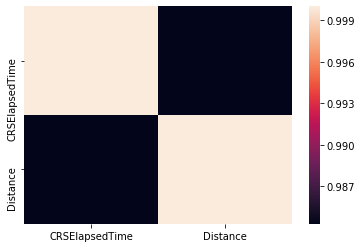

In [19]:
# for the numerical variables, we will use pearson correlation matrix to check for the relationship
flights_2_corr = flights_2.drop(['Cancelled'], axis = 1)
correlation = flights_2_corr.corr()

sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns)

In [20]:
#drop the highly correlated numerical var
flights_2 = flights_2.drop(['CRSElapsedTime'], axis = 1)

In [21]:
# for the categorical variables
# ref : https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorical association"""
    chi2 = chi2_contingency(confusion_matrix, lambda_="log-likelihood")[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

keys = [col for col in flights_2.columns if flights_2[col].dtype == np.object]

for key in keys:
    for key2 in keys:
        if key != key2:
            base_sample = flights_2.sample(n=1000, random_state=1)
            confusion_matrix = pd.crosstab(base_sample[key], base_sample[key2]).as_matrix()
            result = cramers_v(confusion_matrix)
            if result > 0.25:
                print(key, " vs ", key2, " : ", result, " highly correlated")

Year  vs  TailNum  :  0.3599569861748631  highly correlated
UniqueCarrier  vs  TailNum  :  0.9665696745063084  highly correlated
UniqueCarrier  vs  Origin  :  0.8896247820199702  highly correlated
UniqueCarrier  vs  Dest  :  0.8547748760217507  highly correlated
TailNum  vs  Year  :  0.3599569861748631  highly correlated
TailNum  vs  UniqueCarrier  :  0.9665696745063084  highly correlated
Origin  vs  UniqueCarrier  :  0.8896247820199702  highly correlated
Dest  vs  UniqueCarrier  :  0.8547748760217508  highly correlated
CRSDepTimeHH  vs  CRSArrTimeHH  :  0.3429528279452333  highly correlated
CRSArrTimeHH  vs  CRSDepTimeHH  :  0.3429528279452333  highly correlated


In [22]:
#from the above we can see that some variables are correlated. Therefore, we need to 'cut the relationship'
#by removing some of them in such a way that the remaining variables are not correlated
#here we use Year, UniqueCarrier, CRSArrTimeHH to be removed as they have more number of high correlation with other vars
flights_2 = flights_2.drop(['Year', 'UniqueCarrier','CRSArrTimeHH'], axis = 1)

### A3 Transformation

#### A3.a One Hot Encoding / dummies

In [23]:
#keep the original column for tracking
original_columns = list(flights_2.columns)
original_columns.remove('Cancelled')
original_columns.remove('Distance')

In [24]:
def OHE_categorical_variables(X):
    for variable in X.columns:
        if X[variable].dtype == np.object:
            print('Converting ', variable)
            X = pd.concat([X,pd.get_dummies(X[variable], prefix=variable, drop_first=True)],axis=1)
    return X

In [25]:
#OHE is done before train-test split as we need to have the same number of columns for both of dataset
flights_enc = OHE_categorical_variables(flights_2)

Converting  Month
Converting  DayofMonth
Converting  DayOfWeek
Converting  TailNum
Converting  Origin
Converting  Dest
Converting  CRSDepTimeHH


#### A3.b Train Test Split

In [26]:
#splitting X and Y (predictors vs response)
flights_y = flights_enc.copy()[['Cancelled']]
flights_X = flights_enc.drop(['Cancelled'], axis = 1)

# spot the Dataset, split into train test set
X_train, X_test, y_train, y_test = train_test_split(flights_X, flights_y, test_size=0.3, random_state=0)

#finally we have 70% of training set, 30% test set
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(842370, 814) (842370, 1) (361016, 814) (361016, 1)


#### A3.c Remove Outliers

In [27]:
#do the outlier removal for train and test set separately. We have only 1 numerical variable (distance)

In [28]:
#Detect outliers: get the min and the max of the box plot and delete those observations that are not in this range.
def get_outliers(data):
    q75, q25 = np.percentile(data, [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    return min,max

In [30]:
train_flights = pd.concat([X_train, y_train], axis=1)
test_flights = pd.concat([X_test, y_test], axis=1)

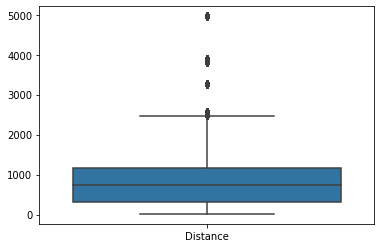

In [31]:
#for training set
sns.boxplot(data=train_flights[['Distance']])
plt.show()

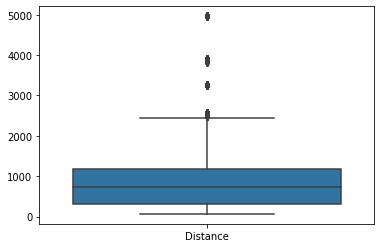

In [32]:
#for test set
sns.boxplot(data=test_flights[['Distance']])
plt.show()

In [33]:
#do the outliers detection for every dataset
train_flights_clean = train_flights.copy()
outliers_train = get_outliers(train_flights_clean['Distance'])
train_flights_clean = train_flights_clean.loc[(train_flights_clean['Distance'] > outliers_train[0]) & (train_flights_clean['Distance'] < outliers_train[1])]

test_flights_clean = test_flights.copy()
outliers_test = get_outliers(test_flights_clean['Distance'])
test_flights_clean = test_flights_clean.loc[(test_flights_clean['Distance'] > outliers_test[0]) & (test_flights_clean['Distance'] < outliers_test[1])]

In [34]:
#re-splitting X and Y (predictors vs response)
y_train = train_flights_clean.copy()[['Cancelled']]
X_train = train_flights_clean.drop(['Cancelled'], axis = 1)
X_train = X_train.drop(original_columns, axis = 1)

y_test = test_flights_clean.copy()[['Cancelled']]
X_test = test_flights_clean.drop(['Cancelled'], axis = 1)
X_test_ori = X_test.copy()[original_columns]
X_test = X_test.drop(original_columns, axis = 1)

In [35]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(830966, 807) (830966, 1) (356022, 807) (356022, 1)


#### A3.d Log Transform

In [36]:
#removing the skewness of the numerical variables
def take_log(data, columns):
    data_log = data.copy()
    data_log[columns] = np.log(data_log[columns]+1)
    return data_log

In [37]:
#Distance variable is skewed. therefore we perform log transform for 'Distance' variable
X_train = take_log(data=X_train,columns=['Distance'])
X_test = take_log(data=X_test,columns=['Distance'])

In [38]:
X_train.head(5)

,Distance,Month_10,Month_11,Month_12,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,...,CRSDepTimeHH_19,CRSDepTimeHH_20,CRSDepTimeHH_21,CRSDepTimeHH_22,CRSDepTimeHH_23,CRSDepTimeHH_5,CRSDepTimeHH_6,CRSDepTimeHH_7,CRSDepTimeHH_8,CRSDepTimeHH_9
908589,6.037871,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
280165,6.335054,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
139726,6.942157,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
911985,5.723585,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1309753,7.376508,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### A3.e Normalization

In [39]:
#normalize numerical variables. categorical variables will be converted to dummies which has 0 or 1 value
def transform_numeric_variables(dataset, column_to_transform):
    data_norm = dataset.copy()[column_to_transform]
    scaler = preprocessing.StandardScaler()
    scaled_df = scaler.fit_transform(data_norm)
    scaled_df = pd.DataFrame(data = scaled_df, columns=data_norm.columns)
    return scaled_df

In [40]:
#normalize Distance as the only numerical variables, do it on both train and test set
column_to_transform = ['Distance']
flights2_norm_train = transform_numeric_variables(X_train, column_to_transform)
flights2_norm_test = transform_numeric_variables(X_test, column_to_transform)
for col in column_to_transform:
    X_train[col] = flights2_norm_train[col].values
    X_test[col] = flights2_norm_test[col].values

#### A3.f Sampling Method: Undersampling

In [41]:
#because we have imbalance data (number of cancelled flights is far less than the number of not cancelled flights,
#and also we have large number of observations for training data (around 800k), we use undersampling to balance the minority class with majority class

In [42]:
def do_undersampling(data_X, data_y):
    X_cols = data_X.columns
    y_col = 'Cancelled'
    # Our independent variables
    X = data_X[X_cols]

    # Our dependent variable
    y = data_y[y_col]
    
    rus = RandomUnderSampler(random_state=10)
    X_s, y_s = rus.fit_sample(X, y)
    
    return X_s, y_s

In [43]:
X_s, y_s = do_undersampling(X_train, y_train)
X_train_us = pd.DataFrame(data=X_s,columns=X_train.columns)
y_train_us = pd.DataFrame(data=y_s,columns=['Cancelled'])

In [44]:
# we can check the numbers of our data after undersampling
print("Length of data is ",len(X_train_us))
print("Number of Cancelled in data",len(y_train_us[y_train_us['Cancelled']==1]))
print("Number of Not Cancelled flights : ",len(y_train_us[y_train_us['Cancelled']==0]))

Length of data is  27790
Number of Cancelled in data 13895
Number of Not Cancelled flights :  13895


### A4 Data Mining and Evaluation

##### General functions:

In [45]:
cols = X_train_us.columns

In [46]:
#function to calculate ROC
def calculate_ROC_AUC(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    return roc_auc

In [47]:
#function to plot ROC_AUC_Curve
def plot_ROC_AUC(classifier, classifier_name, X_test, y_test, y_pred):
    
    pred_prob = classifier.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
    
    plt.figure()
    #plt.plot(fpr, tpr, label= 'area = %0.2f' % roc_auc_score(y_test, y_pred))
    plt.plot(fpr, tpr, label= 'area = %0.2f' % roc_auc_score(y_test, pred_prob))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for ' + classifier_name)
    plt.legend(loc="lower right")
    plt.show()

In [48]:
#function to plot precision_recall
def plot_precision_recall(classifier, classifier_name, X_test, y_test, y_pred):
    # predict probabilities
    lr_probs = classifier.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
    lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
    print(classifier_name, ': f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    # plot the precision-recall curves
    pyplot.plot(lr_recall, lr_precision, marker='.', label=classifier_name)
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

#### A4.a Parameter Tuning

In [49]:
#to choose the best models with the best hyperparameters, we applied gridsearch. we use roc_auc as scoring metric in gridsearch with 5 folds CV

In [50]:
def get_best_param_with_GridSearch(model, parameters, folds, X, y):
    grid_search = GridSearchCV(model, parameters, cv=folds, n_jobs=-1, scoring='roc_auc')
    grid_search.fit(X, y)
    print(grid_search.best_estimator_)
    means = grid_search.cv_results_['mean_test_score']
    stds = grid_search.cv_results_['std_test_score']

    print('Mean AUC (+/- standard deviation), for parameters')
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/- %0.03f) for %r"
              % (mean, std, params))

#### 1) Logistic Regression

In [51]:
# ref : https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-models
parameters = {'max_iter' : [100,110,120,130,140], 'C' : [1.0,1.5,2.0,2.5]}
get_best_param_with_GridSearch(LogisticRegression(penalty = 'l1'), parameters, 5, X_train_us, y_train_us)

LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Mean AUC (+/- standard deviation), for parameters
0.894 (+/- 0.003) for {'C': 1.0, 'max_iter': 100}
0.894 (+/- 0.003) for {'C': 1.0, 'max_iter': 110}
0.894 (+/- 0.003) for {'C': 1.0, 'max_iter': 120}
0.894 (+/- 0.003) for {'C': 1.0, 'max_iter': 130}
0.894 (+/- 0.003) for {'C': 1.0, 'max_iter': 140}
0.899 (+/- 0.003) for {'C': 1.5, 'max_iter': 100}
0.899 (+/- 0.003) for {'C': 1.5, 'max_iter': 110}
0.899 (+/- 0.003) for {'C': 1.5, 'max_iter': 120}
0.899 (+/- 0.003) for {'C': 1.5, 'max_iter': 130}
0.899 (+/- 0.003) for {'C': 1.5, 'max_iter': 140}
0.901 (+/- 0.003) for {'C': 2.0, 'max_iter': 100}
0.901 (+/- 0.003) for {'C': 2.0, 'max_iter': 110}
0.901 (+/- 0.003) for {'C

In [52]:
#the roc_auc_score is considered good for logistic regression model above, and can be used as a baseline.
#but we will try another model to see if there's any better result.
#for predicting cancellation with binary outcome, we will try using decision tree, adaboost random forest, and SVM

#### 2) Decision Tree

In [53]:
parameters = {'max_depth':[None, 50, 100], 'min_samples_leaf': [1, 5, 10], 'criterion':['gini', 'entropy']}

get_best_param_with_GridSearch(DecisionTreeClassifier(), parameters, 5, X_train_us, y_train_us)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Mean AUC (+/- standard deviation), for parameters
0.719 (+/- 0.002) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}
0.796 (+/- 0.003) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5}
0.814 (+/- 0.004) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10}
0.724 (+/- 0.004) for {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1}
0.798 (+/- 0.004) for {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 5}
0.814 (+/- 0.004) for {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 10}
0.719 (+/- 0.006) for {'criterion'

In [54]:
#here we see that decision tree even if we try to find best parameter to use, resulting in lower roc_c_score than logistic regression

#### 3) AdaBoost

In [55]:
parameters = {'learning_rate':[0.01,.1, 1], 'n_estimators': [50,100]}

get_best_param_with_GridSearch(AdaBoostClassifier(), parameters, 5, X_train_us, y_train_us)
#n_estimators = The maximum number of estimators at which boosting is terminated
# Learning rate shrinks the contribution of each classifier by learning_rate

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=None)
Mean AUC (+/- standard deviation), for parameters
0.692 (+/- 0.006) for {'learning_rate': 0.01, 'n_estimators': 50}
0.727 (+/- 0.004) for {'learning_rate': 0.01, 'n_estimators': 100}
0.766 (+/- 0.003) for {'learning_rate': 0.1, 'n_estimators': 50}
0.783 (+/- 0.003) for {'learning_rate': 0.1, 'n_estimators': 100}
0.806 (+/- 0.004) for {'learning_rate': 1, 'n_estimators': 50}
0.822 (+/- 0.004) for {'learning_rate': 1, 'n_estimators': 100}


In [56]:
#Adaboost also performs worse than logistic regression, even though the roc_auc_score is better than decision tree (0.824 vs 0.810)

#### 4) Random Forest

In [57]:
parameters = {'n_estimators':[20, 50, 100], 'min_samples_leaf':[1, 5, 10],'max_depth':[None, 100, 200]}

get_best_param_with_GridSearch(RandomForestClassifier(), parameters, 5, X_train_us, y_train_us)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Mean AUC (+/- standard deviation), for parameters
0.844 (+/- 0.004) for {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 20}
0.855 (+/- 0.005) for {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}
0.861 (+/- 0.004) for {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}
0.829 (+/- 0.005) for {'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 20}
0.833 (+/- 0.005) for {'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 50}
0.834 (+/- 0.005) for {'max_depth

In [58]:
#Random Forest can perform better than adaboost and decision tree, resulting roc_auc_score 0.857

#### 5) SVM

In [74]:
#because we are dealing with large number of sample and SVM is very slow to run, we consider using random sampling of 10k observations
df_train = pd.concat([X_train_us, y_train_us], axis=1)
df_train_sample = df_train.sample(n = 10000)

#splitting X and Y (predictors vs response)
df_train_y = df_train_sample.copy()[['Cancelled']]
df_train_X = df_train_sample.drop(['Cancelled'], axis = 1)

In [75]:
parameters = {'kernel':['linear','poly','rbf'],'C':[0.2,0.5,1.0]}

get_best_param_with_GridSearch(SVC(gamma='auto'), parameters, 5, df_train_X, df_train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Mean AUC (+/- standard deviation), for parameters
0.831 (+/- 0.007) for {'C': 0.2, 'kernel': 'linear'}
0.726 (+/- 0.014) for {'C': 0.2, 'kernel': 'poly'}
0.728 (+/- 0.014) for {'C': 0.2, 'kernel': 'rbf'}
0.846 (+/- 0.008) for {'C': 0.5, 'kernel': 'linear'}
0.726 (+/- 0.014) for {'C': 0.5, 'kernel': 'poly'}
0.754 (+/- 0.013) for {'C': 0.5, 'kernel': 'rbf'}
0.856 (+/- 0.010) for {'C': 1.0, 'kernel': 'linear'}
0.726 (+/- 0.014) for {'C': 1.0, 'kernel': 'poly'}
0.777 (+/- 0.011) for {'C': 1.0, 'kernel': 'rbf'}


In [ ]:
# SVM can give good result also with auc score of 0.856, but the running time is very slow compared to logistic regression

#### Conclusion: from all the result above, we see that logistic regression give the best auc_score than the other models. However, we will try to implement every model with best parameter to compare every model in detail

#### A4.b Prediction

##### 1) Logistic Regression

In [59]:
#applying logistic with the best parameter
logreg = LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train_us, y_train_us)
y_pred_log = logreg.predict(X_test)

Logistic Regression
               precision    recall  f1-score   support

           0       1.00      0.74      0.85    350123
           1       0.06      0.90      0.10      5899

    accuracy                           0.74    356022
   macro avg       0.53      0.82      0.48    356022
weighted avg       0.98      0.74      0.84    356022



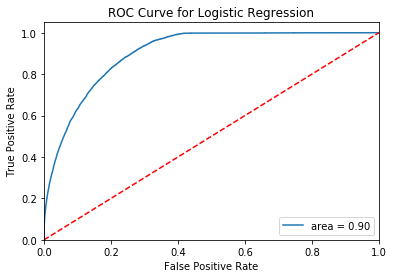

Logistic Regression : f1=0.104 auc=0.210


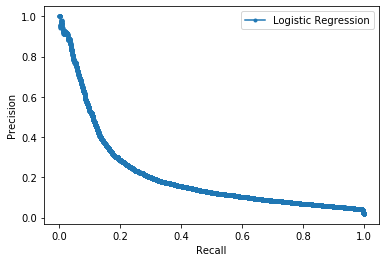

array([[259169,  90954],
       [   602,   5297]])

In [60]:
print("Logistic Regression\n", classification_report(y_test, y_pred_log))
plot_ROC_AUC(logreg, 'Logistic Regression', X_test, y_test, y_pred_log)
plot_precision_recall(logreg, 'Logistic Regression', X_test, y_test, y_pred_log)

#TN   #FP
#FN   #TP
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_log)

In [141]:
#adjusting the threshold for an observation to be classified as positive / cancelled
logreg_thres = LogisticRegression()
logreg_thres.fit(X_train_us, y_train_us)
probac = logreg_thres.predict_proba(X_test)
probability = probac[:,1]
y_pred = pd.DataFrame(probability)
y_pred['Cancelled'] = np.where(y_pred[0]>=0.7, 1, 0)# create a new column
y_pred_thres = list(y_pred['Cancelled'])
confusion_matrix(y_test, y_pred_thres)

array([[308363,  41760],
       [  2331,   3568]])

In [ ]:
#adjusting the threshold will be reducing the FP but will also increase FN

##### insight:
1. applying logistic regression on the independent test set shows similar roc_auc_score from the gridsearch result, which means that the model is not overfitting. also, the accuracy score is 74% which is good enough, thus we can say that the model predict well.
2. however, although we predict cancelled flights quite well (5297 is classified correctly from 5899 cancelled flights), the precision score is very low. it indicates that we have high number of false positive in the testing data (as shown by the confusion matrix above). the testing data has imbalance proportion for cancelled and not cancelled flights, which also affects the number of false positive (91k out of 259k not cancelled flights has been misclassified as cancelled).

#### insight:
1. Randomundersampling has negative effect of producing many false positive (as the model tends to weight the minority class, which in this case is positive/cancelled flights, with the same weight as the majority class)
2. The number of observation of majority class from testing data makes huge impact in the result as can be seen by the confusion matrix and precision-recall graph
3. By using randomundersampling method in training data and trying to predict the cancellation in undersampled testing data, we can obtain good model with good score of roc_auc_score, f1 score, accuracy, precision, and recall. But in the real world scenario, we will have to deal with the imbalanced data in our unseen test data. Therefore, the testing data must be kept as its original
4. To reduce False Positive, we will try different sampling technique in our training data later on

##### 2) Decision Tree

In [105]:
def return_most_important_features(estimator,X_test,y_test):
    important_features = set()
    for c, column in enumerate(X_test.columns):
        if estimator.feature_importances_[c] in sorted(estimator.feature_importances_)[-15:]:
            important_features.add(column)
            
    return important_features

Decision Tree
               precision    recall  f1-score   support

           0       0.99      0.73      0.84    350123
           1       0.04      0.75      0.08      5899

    accuracy                           0.73    356022
   macro avg       0.52      0.74      0.46    356022
weighted avg       0.98      0.73      0.83    356022



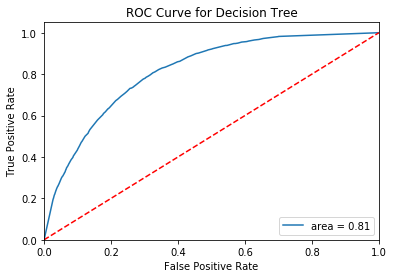

Decision Tree : f1=0.083 auc=0.155


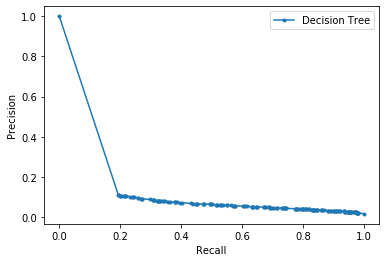

{'DayOfWeek_4',
 'DayOfWeek_7',
 'DayofMonth_12',
 'DayofMonth_16',
 'Dest_IAD',
 'Dest_IAH',
 'Distance',
 'Month_10',
 'Month_12',
 'Month_2',
 'Month_3',
 'Month_6',
 'Origin_IAD',
 'Origin_IAH',
 'Origin_ORD'}

In [220]:
DT = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
DT.fit(X_train_us, y_train_us)
y_pred_DT = DT.predict(X_test)

print('Decision Tree\n', classification_report(y_test, y_pred_DT))
plot_ROC_AUC(DT, 'Decision Tree', X_test, y_test, y_pred_DT)
plot_precision_recall(DT, 'Decision Tree', X_test, y_test, y_pred_DT)
return_most_important_features(DT,X_test,y_test)

In [223]:
print(confusion_matrix(y_test, y_pred_DT))

[[254786  95337]
 [  1503   4396]]


Decision Tree with important features only
               precision    recall  f1-score   support

           0       0.99      0.71      0.83    350123
           1       0.04      0.76      0.08      5899

    accuracy                           0.71    356022
   macro avg       0.52      0.73      0.45    356022
weighted avg       0.98      0.71      0.81    356022



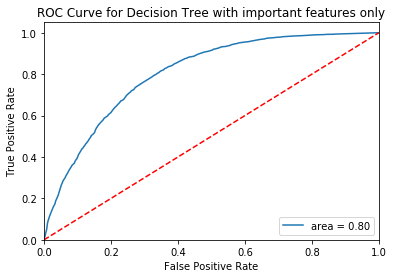

Decision Tree with important features only : f1=0.079 auc=0.085


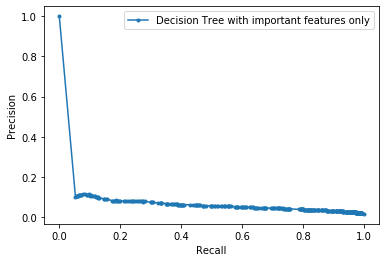

array([[247519, 102604],
       [  1431,   4468]])

In [72]:
#trying to implement with only important features
important_features = ['DayOfWeek_3', 'DayOfWeek_4', 'DayofMonth_12', 'DayofMonth_16', 'Dest_IAD', 'Dest_IAH', 'Distance',
                      'Month_10', 'Month_12', 'Month_2', 'Month_3', 'Month_6', 'Origin_IAD', 'Origin_IAH', 'Origin_ORD']
DT2 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
DT2.fit(X_train_us[important_features], y_train_us)
y_pred_DT2 = DT2.predict(X_test[important_features])
print('Decision Tree with important features only\n', classification_report(y_test, y_pred_DT2))
plot_ROC_AUC(DT2, 'Decision Tree with important features only', X_test[important_features], y_test, y_pred_DT2)
plot_precision_recall(DT2, 'Decision Tree with important features only', X_test[important_features], y_test, y_pred_DT2)
confusion_matrix(y_test, y_pred_DT2)

##### Result: Decision Tree is not performing well enough compared to logistic regression in term of roc_auc_score, accuracy, and precision

##### 3) AdaBoost

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.70      0.82    350123
           1       0.04      0.80      0.08      5899

    accuracy                           0.70    356022
   macro avg       0.52      0.75      0.45    356022
weighted avg       0.98      0.70      0.81    356022



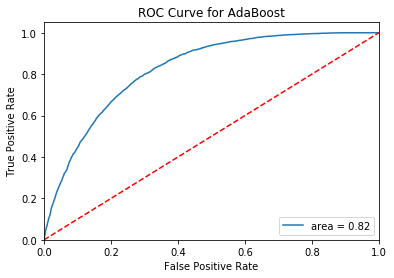

array([[246134, 103989],
       [  1208,   4691]])

In [68]:
#AdaBoost
Ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1, n_estimators=100, random_state=None)
Ada.fit(X_train_us, y_train_us)
y_pred_Ada = Ada.predict(X_test)

print('Classification Report\n', classification_report(y_test, y_pred_Ada))
plot_ROC_AUC(Ada, 'AdaBoost', X_test, y_test, y_pred_Ada)
confusion_matrix(y_test, y_pred_Ada)

AdaBoost : f1=0.082 auc=0.071


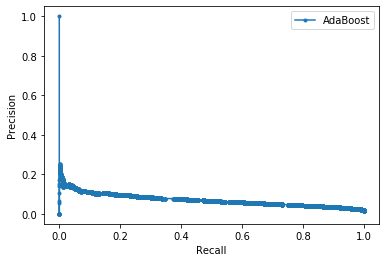

In [69]:
plot_precision_recall(Ada, 'AdaBoost', X_test, y_test, y_pred_Ada)

In [70]:
#return_most_important_features(Ada,X_test,y_test)

##### Result : Adaboost is performing slightly better than Decision tree but it is not performing well enough compared to logistic regression

##### 4) Random Forest

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.72      0.83    350123
           1       0.05      0.84      0.09      5899

    accuracy                           0.72    356022
   macro avg       0.52      0.78      0.46    356022
weighted avg       0.98      0.72      0.82    356022



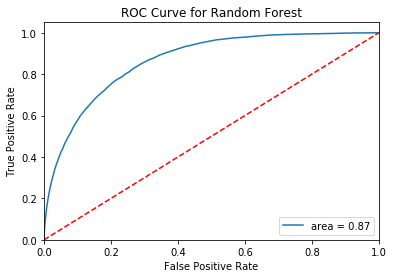

Random Forest : f1=0.090 auc=0.142


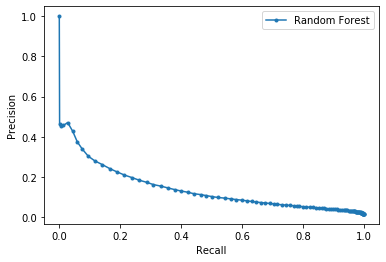

{'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'DayofMonth_16',
 'Dest_IAH',
 'Distance',
 'Month_12',
 'Month_2',
 'Month_3',
 'Origin_IAD',
 'Origin_IAH',
 'Origin_ORD'}

In [71]:
#create random forest with best classifier parameters based on result above
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RF.fit(X_train_us, y_train_us)
y_pred_RF = RF.predict(X_test)

print('Classification Report\n', classification_report(y_test, y_pred_RF))
plot_ROC_AUC(RF, 'Random Forest', X_test, y_test, y_pred_RF)
plot_precision_recall(RF, 'Random Forest', X_test, y_test, y_pred_RF)
return_most_important_features(RF,X_test,y_test)

In [224]:
confusion_matrix(y_test, y_pred_RF)

array([[250516,  99607],
       [   917,   4982]])

Classification Report Random Forest with important features only
               precision    recall  f1-score   support

           0       0.99      0.67      0.80    350123
           1       0.04      0.77      0.07      5899

    accuracy                           0.67    356022
   macro avg       0.52      0.72      0.44    356022
weighted avg       0.98      0.67      0.79    356022



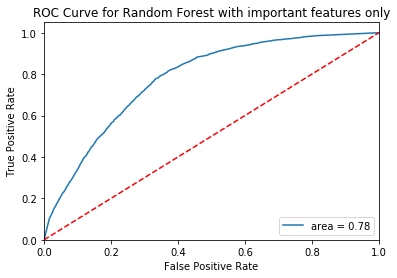

Random Forest with important features only : f1=0.072 auc=0.094


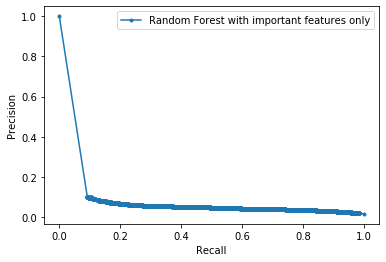

array([[234658, 115465],
       [  1347,   4552]])

In [73]:
## applying RF for only the above important features:
#create random forest with best classifier parameters based on result above
important_features = ['DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_16', 
                      'Dest_IAH', 'Distance', 'Month_12', 'Month_2', 'Month_3', 'Origin_IAD', 'Origin_IAH', 'Origin_ORD']
RF2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RF2.fit(X_train_us[important_features], y_train_us)
y_pred_RF2 = RF2.predict(X_test[important_features])

print('Classification Report Random Forest with important features only\n', classification_report(y_test, y_pred_RF2))
plot_ROC_AUC(RF2, 'Random Forest with important features only', X_test[important_features], y_test, y_pred_RF2)
plot_precision_recall(RF2, 'Random Forest with important features only',  X_test[important_features], y_test, y_pred_RF2)
confusion_matrix(y_test, y_pred_RF2)

##### Result: Random Forest is performing better than Decision tree and Adaboost. Trying to run RF only on the most important features does not improve the model. Overall, RF is not performing well enough compared to logistic regression

##### 5) SVM

SVM
               precision    recall  f1-score   support

           0       1.00      0.70      0.82    350123
           1       0.05      0.92      0.09      5899

    accuracy                           0.70    356022
   macro avg       0.52      0.81      0.46    356022
weighted avg       0.98      0.70      0.81    356022



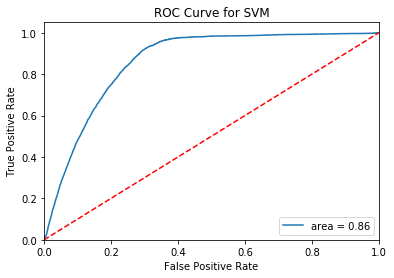

array([[243851, 106272],
       [   446,   5453]])

In [117]:
svm = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svm.fit(df_train_X, df_train_y)
y_pred_svm = svm.predict(X_test)

print('SVM\n', classification_report(y_test, y_pred_svm))
plot_ROC_AUC(svm, 'SVM', X_test, y_test, y_pred_svm)
confusion_matrix(y_test, y_pred_svm)

SVM : f1=0.093 auc=0.069


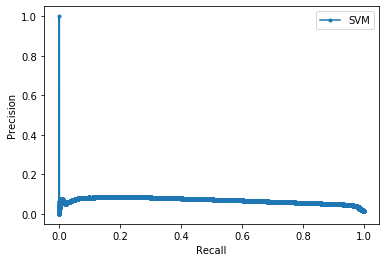

In [118]:
plot_precision_recall(svm, 'SVM',  X_test, y_test, y_pred_svm)

##### SVM outputs similar result to Random Forest in terms of auc score. It even predict more correct number of cancelled flights. However, if we look at the False Positive, it can clearly be seen that SVM performs worse than logistic regression

##### Among all models that we try to predict the training set, we find that logistic regression still perform best than any other model, in terms of accuracy, roc_auc_score, and precision.

#### A4.c Trying to model with different sampling techniques

##### we notice that doing undersampling will make the proportion of cancelled and not cancelled flights to be balanced. As the effect, the model tends to produce many false positive (because it's being emphasized). Therefore, we will try different sampling techniques to compare using logistic regression as the best model we have.

1) Random Sampling + Logistic Regression

Logistic Regression
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    350123
           1       0.90      0.04      0.08      5899

    accuracy                           0.98    356022
   macro avg       0.94      0.52      0.54    356022
weighted avg       0.98      0.98      0.98    356022



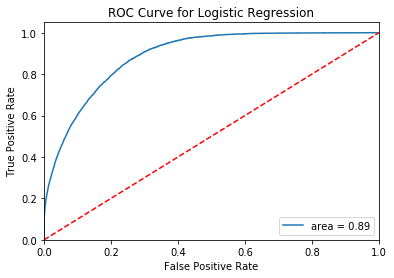

Logistic Regression : f1=0.084 auc=0.231


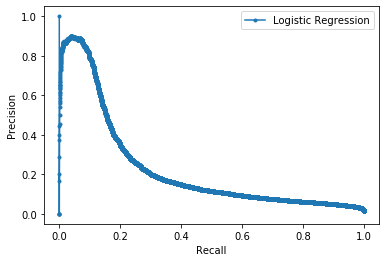

[[350093     30]
 [  5640    259]]


In [107]:
#here we take a sample of 100k
Train_data = pd.concat([X_train, y_train], axis=1)
Train_data_sample = Train_data.sample(n = 100000)
y_train_rs = Train_data_sample.copy()[['Cancelled']]
X_train_rs = Train_data_sample.drop(['Cancelled'], axis = 1)

logreg_rs = LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
logreg_rs.fit(X_train_rs, y_train_rs)
y_pred_log_rs = logreg_rs.predict(X_test)

print("Logistic Regression\n", classification_report(y_test, y_pred_log_rs))
plot_ROC_AUC(logreg_rs, 'Logistic Regression', X_test, y_test, y_pred_log_rs)

#According to Saito and Rehmsmeier, precision-recall plots are more informative 
#than ROC plots when evaluating binary classifiers on imbalanced data.
plot_precision_recall(logreg_rs, 'Logistic Regression', X_test, y_test, y_pred_log_rs)
print(confusion_matrix(y_test, y_pred_log_rs))

In [108]:
# based on the result above, we can minimize the FP by having just 30 FP, but we have many False Negative. 
# Thus, we can say that the model almost not predicting any flights as cancelled. 
# Conclusion: it not a better solution compared to RandomUnderSampling

2) RandomSampling + SMOTE + Logistic Regression

Logistic Regression with SMOTE
               precision    recall  f1-score   support

           0       0.99      0.84      0.91    350123
           1       0.07      0.70      0.12      5899

    accuracy                           0.84    356022
   macro avg       0.53      0.77      0.52    356022
weighted avg       0.98      0.84      0.90    356022



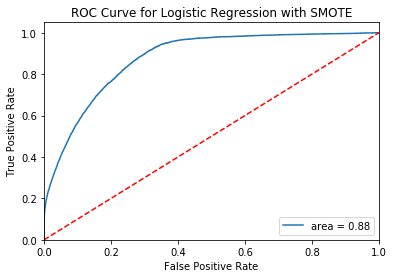

Logistic Regression with SMOTE : f1=0.125 auc=0.213


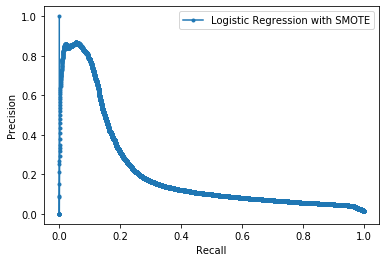

[[293734  56389]
 [  1748   4151]]


In [109]:
Train_data = pd.concat([X_train, y_train], axis=1)
Train_data_sample = Train_data.sample(n = 50000) #we take 50k as a baseline because SMOTE will generate synthetic observation thus we will have more data
y_train_rs = Train_data_sample.copy()[['Cancelled']]
X_train_rs = Train_data_sample.drop(['Cancelled'], axis = 1)

sm = SMOTE()
X_resampled, y_resampled = sm.fit_sample(X_train_rs, y_train_rs)

X_train_sm = pd.DataFrame(data=X_resampled,columns=X_train_rs.columns)
y_train_sm = pd.DataFrame(data=y_resampled,columns=['Cancelled'])

logreg_sm = LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
logreg_sm.fit(X_train_sm, y_train_sm)
y_pred_log_sm = logreg_sm.predict(X_test)

print("Logistic Regression with SMOTE\n", classification_report(y_test, y_pred_log_sm))
plot_ROC_AUC(logreg_sm, 'Logistic Regression with SMOTE', X_test, y_test, y_pred_log_sm)
plot_precision_recall(logreg_sm, 'Logistic Regression with SMOTE', X_test, y_test, y_pred_log_sm)
print(confusion_matrix(y_test, y_pred_log_sm))

In [112]:
# SMOTE offer more balanced result compared to random under sampling. it reduce the number of false positive but also 
#increasing the number of false negative

3) Random Sampling + ADASYN + Logistic Regression

Logistic Regression with SMOTE
               precision    recall  f1-score   support

           0       0.99      0.84      0.91    350123
           1       0.07      0.71      0.12      5899

    accuracy                           0.83    356022
   macro avg       0.53      0.77      0.52    356022
weighted avg       0.98      0.83      0.89    356022



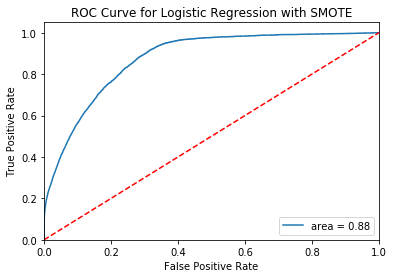

Logistic Regression : f1=0.123 auc=0.209


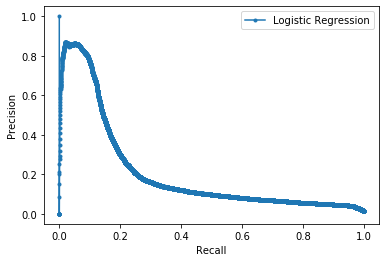

[[292461  57662]
 [  1720   4179]]


In [111]:
ada = ADASYN()
X_resampled, y_resampled = ada.fit_sample(X_train_rs, y_train_rs) #also using 50k random sampling data

X_train_ada = pd.DataFrame(data=X_resampled,columns=X_train_rs.columns)
y_train_ada = pd.DataFrame(data=y_resampled,columns=['Cancelled'])

logreg_ada = LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
logreg_ada.fit(X_train_ada, y_train_ada)
y_pred_log_ada = logreg_ada.predict(X_test)

print("Logistic Regression with SMOTE\n", classification_report(y_test, y_pred_log_ada))
plot_ROC_AUC(logreg_ada, 'Logistic Regression with SMOTE', X_test, y_test, y_pred_log_ada)
plot_precision_recall(logreg_ada, 'Logistic Regression', X_test, y_test, y_pred_log_ada)
print(confusion_matrix(y_test, y_pred_log_ada))

4) Random Sampling + ENN + Logistic Regression

Logistic Regression with SMOTE
               precision    recall  f1-score   support

           0       0.99      0.84      0.91    350123
           1       0.04      0.36      0.07      5899

    accuracy                           0.83    356022
   macro avg       0.51      0.60      0.49    356022
weighted avg       0.97      0.83      0.89    356022



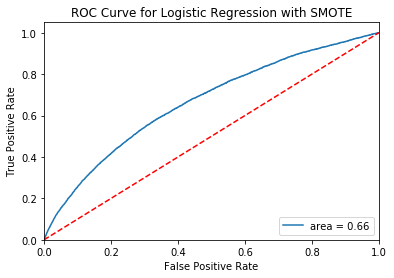

Logistic Regression : f1=0.066 auc=0.034


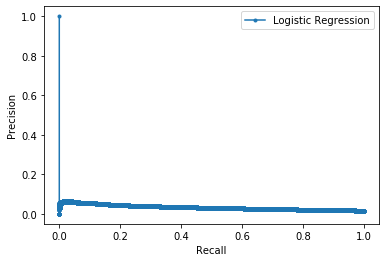

[[294754  55369]
 [  3796   2103]]


In [113]:
Train_data = pd.concat([X_train, y_train], axis=1)
Train_data_sample = Train_data.sample(n = 5000) #we take 10k of sample because SMOTEENN is very time consuming to try with larger number of sample
y_train_rs = Train_data_sample.copy()[['Cancelled']]
X_train_rs = Train_data_sample.drop(['Cancelled'], axis = 1)

se = SMOTEENN()
X_resampled, y_resampled = se.fit_sample(X_train_rs, y_train_rs)
X_train_se = pd.DataFrame(data=X_resampled,columns=X_train_rs.columns)
y_train_se = pd.DataFrame(data=y_resampled,columns=['Cancelled'])

logreg_se = LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
logreg_se.fit(X_train_se, y_train_se)
y_pred_log_se = logreg_se.predict(X_test)

print("Logistic Regression with SMOTE\n", classification_report(y_test, y_pred_log_se))
plot_ROC_AUC(logreg_se, 'Logistic Regression with SMOTE', X_test, y_test, y_pred_log_se)
plot_precision_recall(logreg_se, 'Logistic Regression', X_test, y_test, y_pred_log_se)
print(confusion_matrix(y_test, y_pred_log_se))

In [114]:
X_train_se.shape

(7611, 807)

5) Random Sampling + Tomek + Logistic Regression

Logistic Regression with SMOTE
               precision    recall  f1-score   support

           0       0.99      0.91      0.95    350123
           1       0.07      0.41      0.12      5899

    accuracy                           0.90    356022
   macro avg       0.53      0.66      0.53    356022
weighted avg       0.97      0.90      0.93    356022



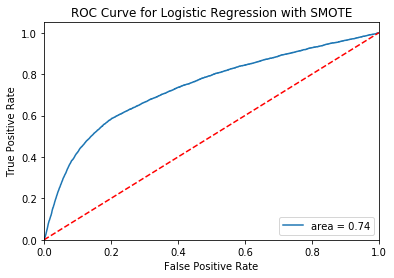

Logistic Regression : f1=0.117 auc=0.055


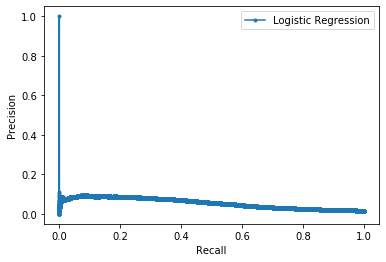

[[317365  32758]
 [  3489   2410]]


In [115]:
Train_data = pd.concat([X_train, y_train], axis=1)
Train_data_sample = Train_data.sample(n = 10000) #we take 10k of sample because Tomek is very time consuming to try with larger number of sample
y_train_rs = Train_data_sample.copy()[['Cancelled']]
X_train_rs = Train_data_sample.drop(['Cancelled'], axis = 1)

st = SMOTETomek()
X_resampled, y_resampled = st.fit_sample(X_train_rs, y_train_rs)  #we use 10k of sample from the previous step
X_train_st = pd.DataFrame(data=X_resampled,columns=X_train_rs.columns)
y_train_st = pd.DataFrame(data=y_resampled,columns=['Cancelled'])

logreg_st = LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
logreg_st.fit(X_train_st, y_train_st)
y_pred_log_st = logreg_st.predict(X_test)

print("Logistic Regression with SMOTE\n", classification_report(y_test, y_pred_log_st))
plot_ROC_AUC(logreg_st, 'Logistic Regression with SMOTE', X_test, y_test, y_pred_log_st)
plot_precision_recall(logreg_st, 'Logistic Regression', X_test, y_test, y_pred_log_st)
print(confusion_matrix(y_test, y_pred_log_st))

In [116]:
X_train_st.shape

(19636, 807)

##### Conclusion: from trying every sampling technique, we find that every attempt to balance minority class in the training data will result in making model tends to follow the 'synthetic' proportion between minority & majority class in the testing data (which we kept imbalance to mimic the real world case). That is why when we are having undersampling and any oversampling methods, we dont have issue with classification of minority class, but we will have many false positive in the majority class.

##### Now, to choose the model we should consider in which aspect do we want to focus on. if the cost for false positive classification is high (predicting not cancelled flight as cancelled) then we should choose random sampling over undersampling or any oversampling methods. This option has drawback also, as can be seen in the confusion matrix of randomsampling + logistic, that the number of false negatif is high.

##### in the case of cancellation prediction, we choose to minimize False Negative. Therefore, we still choose Random Undersampling method with Logistic Regression model as our best model to predict cancellation

#### A4.d Recommendation

In [123]:
#applying logistic with the best parameter
logreg = LogisticRegression(C=2.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=120,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train_us, y_train_us)
y_pred_log = logreg.predict(X_test)

In [132]:
print('Intercept')
print(logreg.intercept_)
#print ("Coefficients")
#print(logreg.coef_)
#print ("Odds Ratios")
#print (np.exp(logreg.coef_))

Intercept
[1.56195852]


In [124]:
#creating new dataframe which contain the original column (before converted into dummies, without dependent variable), 
#and concatenated with the predicted value
Predicted_data = X_test_ori.copy()
Predicted_data['Predicted'] = y_pred_log
Predicted_data['True_Value'] = y_test

In [129]:
Predicted_data.head(5)

,Month,DayofMonth,DayOfWeek,TailNum,Origin,Dest,CRSDepTimeHH,Predicted,True_Value
1456401,5,20,2,N63305,IAH,PIT,10,0,0
451254,9,21,4,N37287,PHX,EWR,11,0,0
1758807,12,26,5,N437YV,PHX,PSP,9,1,0
1686786,10,20,1,N47414,EWR,FLL,16,0,0
1320055,2,13,3,N16732,LGA,IAH,20,0,0


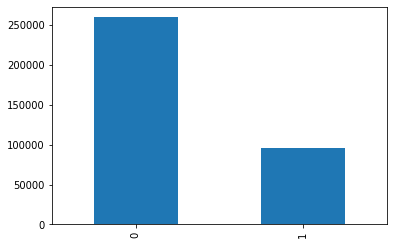

In [145]:
Predicted_data['Predicted'].value_counts(sort=False).plot(kind='bar')

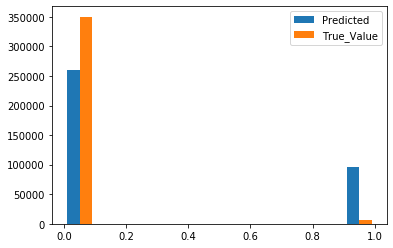

In [240]:
plt.hist([Predicted_data['Predicted'], Predicted_data['True_Value']], label=['Predicted', 'True_Value'])
plt.legend(loc='upper right')
plt.show()

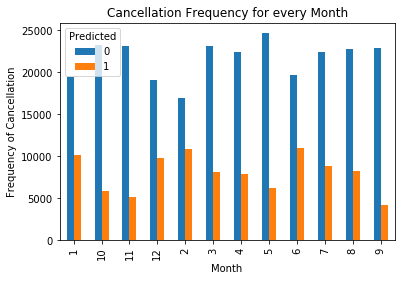

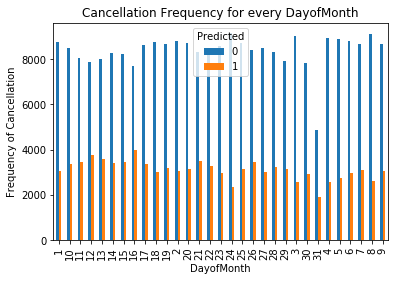

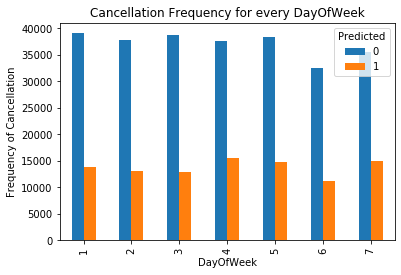

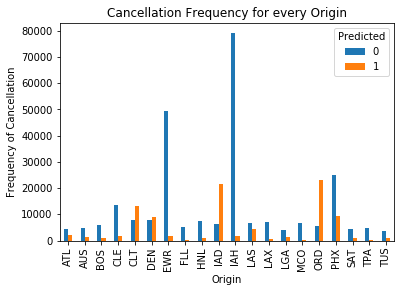

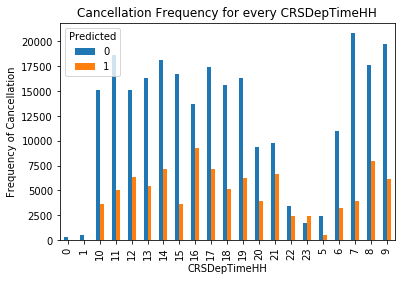

In [133]:
def plot_the_freq_graph(flights, to_plot):
    %matplotlib inline
    for item in to_plot:
        #pd.crosstab(X_train_log[item],y_train_log['Cancelled']).plot(kind='bar')
        pd.crosstab(flights[item],flights['Predicted']).plot(kind='bar')
        plt.title('Cancellation Frequency for every {}'.format(item))
        plt.xlabel(item)
        plt.ylabel('Frequency of Cancellation')
        plt.savefig('cancel_fre_{}'.format(item))
        
to_plot = ['Month','DayofMonth','DayOfWeek','Origin','CRSDepTimeHH']
plot_the_freq_graph(Predicted_data, to_plot)

## B. PREDICTING FLIGHTS DELAY

In [154]:
flight_data = pd.read_csv('060708_COYV.csv', encoding = 'latin1')

In [155]:
flight_data.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,1,7,900.0,915,1016.0,1030,YV,7171,...,16.0,19.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2006,1,1,7,1655.0,1658,1820.0,1820,YV,7210,...,10.0,7.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2006,1,1,7,728.0,725,853.0,840,YV,7233,...,8.0,21.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
3,2006,1,1,7,1815.0,1745,2010.0,1949,YV,2885,...,11.0,6.0,0,NaN,0,21.0,0.0,0.0,0.0,0.0
4,2006,1,1,7,NaN,1135,NaN,1235,YV,7053,...,0.0,0.0,1,C,0,0.0,0.0,0.0,0.0,0.0


### B1. Data Selection

In [156]:
flight_data_CO_YV=flight_data.loc[flight_data['Cancelled']==0]

In [159]:
flight_data_CO_YV['UniqueCarrier'].value_counts()

CO    922693
YV    824006
Name: UniqueCarrier, dtype: int64

In [160]:
flight_data_CO_YV.shape

(1746699, 29)

### B2. Data cleaning and preprocessing

#### B2.a Removing Unnecessary variables

#### We will remove the below variables for the following reasons:
1. DayofMonth - Too many unique values. We are more focussed to find a trend with respect to year, month or week. DayofMonth would be too specific.
2. DepTime - This can be calculated by using Scheduled Departure Time and Departure Delay.
3. ArrTime - This can be calculated by sung Scheduled Arrival Time and Arrival Delay.
4. ActualElapsedTime, AirTime - Can only be considered for Arrival Delays, but we would not have this information when we would be predicting Arrival Delays in real time.
6. FlightNum - Too many unique values(2k), which would result in many dummies. There is no way to combine the values in a smaller subset.
7. TailNum - Too many unique values(1k), which would result in many dummies. There is no way to combine the values in a smaller subset. Also tried and tested model including this variable and it doesn't add any new information in prediction.
8. Diverted - All 0s.
9. TaxiIn - Can only be considered for Departure Delays, but it wouldn't be available when we would be predicting departure delays in realtime.
10. Cancelled - Not required for predicting delays. All 0s.
11. CancelledCode - Not required for predicting delays. All NAs.
12. CarrierDelay, SecurityDelay, LateAircraftDelay - Can only be considered for arrival delays, but all these delays can be captured by single departure delay variable.
13. WeatherDelay, NASDelay - These variables are very natural and don't depend on how a business functions.

In [162]:
variables_to_remove = ['DayofMonth', 'DepTime', 'ArrTime', 'ActualElapsedTime', 'AirTime','FlightNum','TailNum','Diverted',
                       'TaxiIn', 'Cancelled', 'CancellationCode','CarrierDelay', 'WeatherDelay', 
                       'NASDelay', 'SecurityDelay','LateAircraftDelay']
flight_data_CO_YV.drop(variables_to_remove, axis=1, inplace=True)

#### B2.b Fixing Missing Values

In [163]:
# Calculating the filling factor and missing values in each variable of the dataset
missing_df = flight_data_CO_YV.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(flight_data_CO_YV.shape[0]-missing_df['missing values'])/flight_data_CO_YV.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,ArrDelay,4734,99.728974
1,Year,0,100.000000
2,Month,0,100.000000
3,DayOfWeek,0,100.000000
4,CRSDepTime,0,100.000000
5,CRSArrTime,0,100.000000
6,UniqueCarrier,0,100.000000
7,CRSElapsedTime,0,100.000000
8,DepDelay,0,100.000000
9,Origin,0,100.000000


##### As we see that ArrDelay has just 0.3% missing values. Hence, we will go ahead with dropping these rows.

In [164]:
flight_data_CO_YV=flight_data_CO_YV.dropna()

In [165]:
flight_data_CO_YV.shape

(1741965, 13)

In [166]:
flight_data_CO_YV.columns

Index(['Year', 'Month', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'UniqueCarrier', 'CRSElapsedTime', 'ArrDelay', 'DepDelay', 'Origin',
       'Dest', 'Distance', 'TaxiOut'],
      dtype='object')

In [167]:
flight_data_CO_YV.dtypes

Year                int64
Month               int64
DayOfWeek           int64
CRSDepTime         object
CRSArrTime         object
UniqueCarrier      object
CRSElapsedTime    float64
ArrDelay          float64
DepDelay          float64
Origin             object
Dest               object
Distance          float64
TaxiOut           float64
dtype: object

In [168]:
# Since Year, Month and DayofWeek are numerical but categorical in nature, so converting their datatype to string.
flight_data_CO_YV['Year'] = flight_data_CO_YV['Year'].astype(str)
flight_data_CO_YV['Month'] = flight_data_CO_YV['Month'].astype(str)
flight_data_CO_YV['DayOfWeek'] = flight_data_CO_YV['DayOfWeek'].astype(str)

In [ ]:
#_________________________________________________________
# Function that convert the 'HHMM' string to an interval time

def format_hour(hour):
    if pd.isnull(hour):
        return np.nan
    else:
        if hour >=0  and hour < 600:
            return "Early Morning (00:00-6:00)"
        elif hour >= 600 and hour < 1200:
            return "Morning (6:00-12:00)"
        elif hour >= 1200 and hour < 4000:
            return "Afternoon (12:00-16:00)"
        elif hour >= 4000 and hour < 2000:
            return "Evening (16:00-20:00)"
        else:
            return "Night (20:00-00:00)"

# Converting Scheduled Departure Time and Scheduled Arrival Time to intervals using above function
flight_data_CO_YV['CRSDepTime'] = flight_data_CO_YV['CRSDepTime'].apply(format_hour)
flight_data_CO_YV['CRSArrTime'] = flight_data_CO_YV['CRSArrTime'].apply(format_hour)

In [169]:
# Separating datasets for Arrival and Departure
Arrival=flight_data_CO_YV.copy()
Departure=flight_data_CO_YV.copy()

In [170]:
#filter for only top 20 busiest origin airports in Departure dataset and dropping 'Dest' as Destination airport would not affect departure delay.
filtered_ori_airports = ['IAH', 'EWR', 'PHX', 'ORD', 'IAD', 'CLT', 'DEN', 'CLE', 'LAS', 'HNL', 'LAX', 'BOS', 'MCO', 'ATL', 'AUS', 'SAT', 'LGA', 'FLL', 'TUS', 'TPA']
Departure = Departure.loc[Departure['Origin'].isin(filtered_ori_airports)]
Departure.drop(['Dest'],axis=1, inplace=True)

In [171]:
#filter for only top 20 busiest destination airports in Arrival dataset and dropping 'Origin' as origin airport would not affect Arrival delays
filtered_dest_airports = ['IAH', 'EWR', 'PHX', 'ORD', 'IAD', 'CLT', 'DEN', 'CLE', 'LAS', 'HNL', 'LAX', 'BOS', 'MCO', 'ATL', 'AUS', 'SAT', 'LGA', 'FLL', 'TUS', 'TPA']
Arrival = Arrival.loc[Arrival['Dest'].isin(filtered_dest_airports)]
Arrival.drop(['Origin'],axis=1, inplace=True)

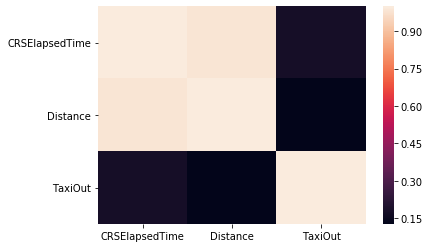

In [172]:
# calculating correlation for the numerical variables of departure dataset and plotting the corresponding heatmap
Dep_corr = Departure.drop(['ArrDelay', 'DepDelay'], axis = 1) #dropping the response variables
correlation = Dep_corr.corr()

sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns)

##### CRSElapsedTime and Distance are highly correlated

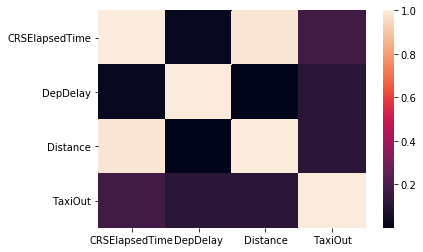

In [173]:
# calculating correlation for the numerical variables of departure dataset and plotting the corresponding heatmap.
Arr_corr = Arrival.drop(['ArrDelay'], axis = 1) #dropping the response variable
correlation = Arr_corr.corr()

sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns)

##### CRSElapsedTime and Distance are highly correlated

In [174]:
#droppin CRSElapsedTime- highly correlated variable from both datasets
Departure.drop(['CRSElapsedTime'], axis=1, inplace=True)
Arrival.drop(['CRSElapsedTime'], axis=1, inplace=True)

In [177]:
print(Departure.shape)
print(Arrival.shape)
print(Departure.columns)

(1180514, 11)
(1177889, 11)
Index(['Year', 'Month', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'UniqueCarrier', 'ArrDelay', 'DepDelay', 'Origin', 'Distance',
       'TaxiOut'],
      dtype='object')


### B3. Data Transformation

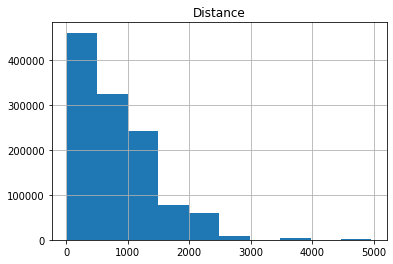

In [178]:
#Checking the skewness of the numerical variable in Departure dataset by plotting histogram.
Departure[['Distance']].hist()
plt.show()

##### Clearly Distance is right skewed

Index(['Year', 'Month', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime',
       'UniqueCarrier', 'ArrDelay', 'DepDelay', 'Dest', 'Distance', 'TaxiOut'],
      dtype='object')


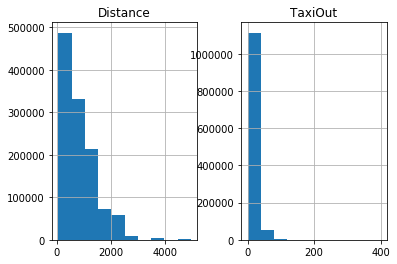

In [180]:
print(Arrival.columns)
#Checking the skewness of the numerical variable in Arrival dataset by plotting histogram.
Arrival[['Distance','TaxiOut']].hist()
plt.show()

##### Both Distance and TaxiOut are right skewed here

#### B3.a Fixing the skewness in data

In [182]:
# method of log transformation of numerical variables to remove the skewness
def take_log(data, columns):
    data_log = data.copy()
    data_log[columns] = np.log(data_log[columns]+1)
    return data_log

# Converting the numerical variables into log transformed variables
Departure_log = take_log(data=Departure,columns=['Distance'])
Arrival_log = take_log(data=Arrival,columns=['Distance', 'TaxiOut'])

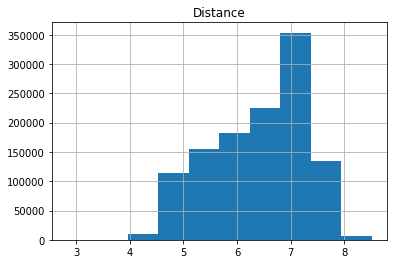

In [183]:
Departure_log[['Distance']].hist()
plt.show()

##### Normally distributed

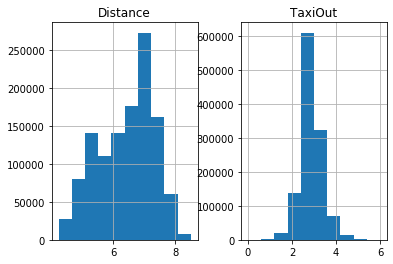

In [184]:
Arrival_log[['Distance','TaxiOut']].hist()
plt.show()

##### Normally distributed

#### B3.b Converting Categorical to Dummy Variables

In [185]:
# method to convert categorical variable to respective dummies
def convert_categorical_variables(X):
    for variable in X.columns:
        if X[variable].dtype == np.object:
            print('Converting',variable)
            X = pd.concat([X,pd.get_dummies(X[variable], prefix=variable, drop_first=True)],axis=1).drop([variable],axis=1)
    return X

# Calling the datasets to get the dummies
Dep_with_dummy=convert_categorical_variables(Departure_log)
Arr_with_dummy=convert_categorical_variables(Arrival_log)

Converting Year
Converting Month
Converting DayOfWeek
Converting CRSDepTime
Converting CRSArrTime
Converting UniqueCarrier
Converting Origin
Converting Year
Converting Month
Converting DayOfWeek
Converting CRSDepTime
Converting CRSArrTime
Converting UniqueCarrier
Converting Dest


In [186]:
print(Dep_with_dummy.shape)
print(Arr_with_dummy.shape)

(1180514, 47)
(1177889, 47)


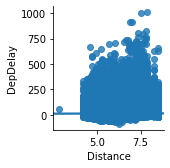

In [187]:
# plotting scatter plot for departure dataset to check correlation of dependent variable with independent variable.
# Only passing numerical variables in x and dependent variable in y
sns.pairplot(Dep_with_dummy, x_vars=['Distance'], y_vars='DepDelay', kind='reg')

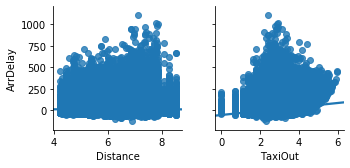

In [188]:
# plotting scatter plot for arrival dataset to check correlation of dependent variable with independent variable.
# Only passing numerical variables in x and dependent variable in y
sns.pairplot(Arr_with_dummy, x_vars=['Distance','TaxiOut'], y_vars='ArrDelay', kind='reg')

#### B3.c Detecting Outliers

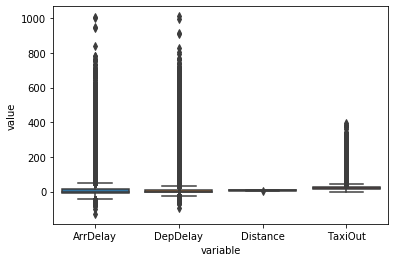

In [189]:
# Since data is same yet for both arrival and departure dataset, hence plotting boxplot for only one dataset to spot the outliers.
df = pd.DataFrame(data = Dep_with_dummy, columns = ['ArrDelay','DepDelay','Distance', 'TaxiOut'])

sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

##### All the 4 variables seem to have outliers. We will remove them by calculating the IQR for each variable and then, dropping the values lying outside the IQR.

In [190]:
# method to get the min and the max of the box plot.
def get_outliers(data):
    q75, q25 = np.percentile(data, [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    return min,max

In [191]:
# method to delete the outliers lying outside the min-max of IQR
def rm_outliers (data, var):
    outliers = []
    #detect outliers for each variable
    for i in var:
        outliers.append(get_outliers(data[i]))
        
    #Delete them for each var
    data_no = data[((data[var[0]]>outliers[0][0]) & (data[var[0]]<outliers[0][1])) &
                          ((data[var[1]]>outliers[1][0]) & (data[var[1]]<outliers[1][1])) &
                          ((data[var[2]]>outliers[2][0]) & (data[var[2]]<outliers[2][1])) &
                          ((data[var[3]]>outliers[3][0]) & (data[var[3]]<outliers[3][1]))]
    return data_no

Dep_dummy_clean = rm_outliers(Dep_with_dummy, ['ArrDelay', 'DepDelay', 'Distance','TaxiOut'])
Arr_dummy_clean = rm_outliers(Arr_with_dummy, ['ArrDelay', 'DepDelay', 'Distance','TaxiOut'])

In [192]:
print(Dep_dummy_clean.shape)
print(Arr_dummy_clean.shape)

(960220, 47)
(983616, 47)


In [193]:
Dep_dummy_clean.drop(['ArrDelay','TaxiOut'], axis=1, inplace=True) # dropping useless variables for departure delay

#### B3.d Normalization

In [194]:
# Standard normalise the appropriate variables
def normalize_data(feature_cols,data):
    to_normalise = feature_cols# only normalizing numerical variables
    normalised_data = data.copy()
    ss = StandardScaler()
    norm_data = ss.fit_transform(normalised_data[to_normalise].values)
    normalised_data[to_normalise] = norm_data
    return normalised_data

In [195]:
Departure_norm=normalize_data(['Distance'],Dep_dummy_clean)
Arrival_norm=normalize_data(['TaxiOut','DepDelay','Distance'],Arr_dummy_clean)

In [196]:
# sampling the Departure Dataset
Dep_sample = Departure_norm.sample(n = 100000)

y_dep_sample = Dep_sample.copy()[['DepDelay']]
X_dep_sample = Dep_sample.drop(['DepDelay'], axis = 1)

In [197]:
# sampling the Arrival Dataset
Arr_sample = Arrival_norm.sample(n = 100000)

y_arr_sample = Arr_sample.copy()[['ArrDelay']]
X_arr_sample = Arr_sample.drop(['ArrDelay'], axis = 1)

### B4. Data Mining

#### B4.a Model 1: Multiple Linear Regression

#### 1) Departure Delay

In [198]:
lin_reg_Dep = LinearRegression(fit_intercept=True)
rmse_scores_dep=np.sqrt(-cross_val_score(lin_reg_Dep, X_dep_sample, y_dep_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_dep.mean()))

ML RMSE: 8.486061793897917


#### 2) Arrival Delay

In [199]:
lin_reg_Arr = LinearRegression(fit_intercept=True)
rmse_scores_arr=np.sqrt(-cross_val_score(lin_reg_Arr, X_arr_sample, y_arr_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_arr.mean()))

ML RMSE: 10.278168550821885


##### Inferences: Decent RMSE values. We will further move on to dimensionality reduction via PCA and see if it improves.

#### Dimensionality Reduction - PCA

#### 1) Departure Delay

In [201]:
pca_dep = PCA()
dep_reduced = pca_dep.fit_transform(X_dep_sample)
#print(pca_dep.explained_variance_ratio_)
np.cumsum(np.round(pca_dep.explained_variance_ratio_, decimals=4)*100)

array([ 24.61,  32.66,  39.81,  44.81,  48.15,  51.31,  54.45,  57.57,
        60.69,  63.59,  66.04,  68.05,  69.96,  71.86,  73.73,  75.59,
        77.42,  79.22,  80.99,  82.73,  84.44,  86.1 ,  87.7 ,  89.27,
        90.68,  92.02,  93.14,  94.09,  94.89,  95.62,  96.12,  96.58,
        96.98,  97.38,  97.76,  98.13,  98.47,  98.78,  99.08,  99.37,
        99.62,  99.83,  99.99, 100.01])

Text(0, 0.5, 'Explained variance')

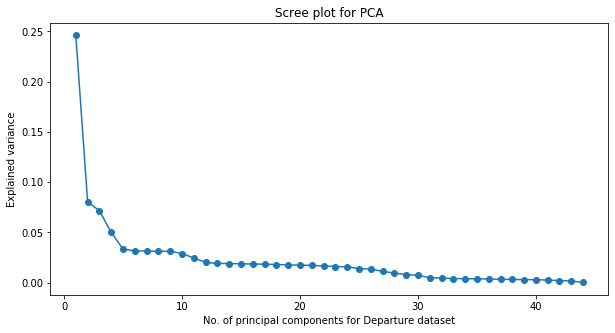

In [202]:
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,len(pca_dep.components_)+1),pca_dep.explained_variance_ratio_,'-o')
plt.axis('tight')
plt.title('Scree plot for PCA')
plt.xlabel('No. of principal components for Departure dataset')
plt.ylabel('Explained variance')

##### No of optimal components chosen = 5

#### 2) Arrival Delay

In [203]:
pca_arr = PCA()
arr_reduced = pca_arr.fit_transform(X_arr_sample)
#print(pca_dep.explained_variance_ratio_)
np.cumsum(np.round(pca_arr.explained_variance_ratio_, decimals=4)*100)

array([21.6 , 35.74, 47.71, 53.28, 58.18, 61.69, 63.98, 66.19, 68.36,
       70.53, 72.69, 74.68, 76.38, 77.77, 79.09, 80.41, 81.72, 83.02,
       84.31, 85.59, 86.84, 88.07, 89.28, 90.45, 91.59, 92.67, 93.67,
       94.61, 95.35, 95.91, 96.4 , 96.84, 97.18, 97.5 , 97.81, 98.09,
       98.36, 98.62, 98.87, 99.09, 99.31, 99.52, 99.71, 99.87, 99.97,
       99.98])

Text(0, 0.5, 'Explained variance')

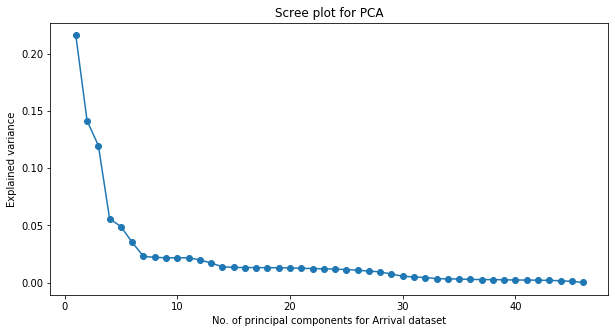

In [204]:
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,len(pca_arr.components_)+1),pca_arr.explained_variance_ratio_,'-o')
plt.axis('tight')
plt.title('Scree plot for PCA')
plt.xlabel('No. of principal components for Arrival dataset')
plt.ylabel('Explained variance')

##### No of optimal components chosen = 7

#### B4.b Model 2: PCA + MLR

#### 1) Departure Delay

In [205]:
pca_dep = PCA(n_components=5)
dep_reduced = pca_dep.fit_transform(X_dep_sample)

In [206]:
lin_reg_Dep = LinearRegression(fit_intercept=True)
rmse_scores_dep=np.sqrt(-cross_val_score(lin_reg_Dep, dep_reduced, y_dep_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_dep.mean()))

ML RMSE: 8.627400368870335


##### RMSE increased from 8.4 to 8.6.

#### 2) Arrival Delay

In [207]:
pca_arr = PCA(n_components=7)
arr_reduced = pca_arr.fit_transform(X_arr_sample)

In [208]:
lin_reg_Arr = LinearRegression(fit_intercept=True)
rmse_scores_arr=np.sqrt(-cross_val_score(lin_reg_Arr, arr_reduced, y_arr_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_arr.mean()))

ML RMSE: 10.665583325194582


##### RMSE increased from 10.2 to 10.6

##### Inferences: Since PCA reduced dataset is increasing the RMSE, we would not go ahead with PCA.

#### OLS Summary

#### 1) Departure Delay

In [210]:
import statsmodels.api as sm

X = pd.concat([pd.DataFrame(np.ones((X_dep_sample.shape[0], 1)).astype(int),
                                  index=X_dep_sample.index), X_dep_sample], axis=1)
X.rename(columns={0: 'const'}, inplace=True)

X_opt = X
regressor_OLS_dep = sm.OLS(endog = y_dep_sample, exog = X_opt).fit()
regressor_OLS_dep.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DepDelay   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     154.5
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:01:38   Log-Likelihood:            -3.5568e+05
No. Observations:              100000   AIC:                         7.114e+05
Df Residuals:                   99955   BIC:                         7.119e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.8456      0.242      3.489      0.000       0.371       1.321
Distance                                  0.5544      0.035     15.845      0.000       0.486       0.623
Year_2007                                -0.3724      0.065     -5.742      0.000      -0.500      -0.245
Year_2008                                 0.2882      0.067      4.322      0.000       0.158       0.419
Month_10                                 -0.4831      0.130     -3.722      0.000      -0.738      -0.229
Month_11                                 -0.5559      0.131     -4.245      0.000      -0.813      -0.299
Month_12                                  1.3307      0.133     10.043      0.000       1.071       1.590
Month_2                                   1.0114      0.134      7.573      0.000       0.750       1.273
Month_3                                   1.2345      0.129      9.590      0.000       0.982       1.487
Month_4                                   0.6596      0.129      5.099      0.000       0.406       0.913
Month_5                                   0.1975      0.129      1.536      0.124      -0.054       0.449
Month_6                                   1.5211      0.132     11.515      0.000       1.262       1.780
Month_7                                   1.2143      0.130      9.321      0.000       0.959       1.470
Month_8                                   0.5751      0.129      4.446      0.000       0.322       0.829
Month_9                                  -1.3789      0.132    -10.478      0.000      -1.637      -1.121
DayOfWeek_2                              -0.7470      0.099     -7.517      0.000      -0.942      -0.552
DayOfWeek_3                              -0.5624      0.100     -5.649      0.000      -0.758      -0.367
DayOfWeek_4                               0.0985      0.099      0.994      0.320      -0.096       0.293
DayOfWeek_5                               0.5948      0.099      5.983      0.000       0.400       0.790
DayOfWeek_6                              -0.0849      0.102     -0.833      0.405      -0.285       0.115
DayOfWeek_7                               0.1860      0.099      1.872      0.061      -0.009       0.381
CRSDepTime_Early Morning (00:00-6:00)    -2.1882      0.268     -8.150      0.000      -2.714      -1.662
CRSDepTime_Morning (6:00-12:00)          -1.6544      0.078    -21.162      0.000      -1.808      -1.501
CRSArrTime_Early Morning (00:00-6:00)     0.3399      0.204      1.667      0.095      -0.060       0.739
CRSArrTime_Morning (6:00-12:00)          -0.9901      0.087    -11.379      0.000      -1.161      -0.820
UniqueCarrier_YV                          0.1552      0.106      1.460      0.144      -0.053       0.364
Origin_AU

##### As we see, we have few variables whose p-values are insignificant and also, they have very low coefficient values. So, we will drop those variables and see if it impacts our R2(0.063).

In [211]:
# Removing variables having less significant p-value and low coefficients
X.drop(['Month_5','DayOfWeek_4','DayOfWeek_6','DayOfWeek_6','UniqueCarrier_YV','Origin_PHX','Origin_TUS'], axis=1, inplace=True)
X_opt = X
regressor_OLS_dep_1 = sm.OLS(endog = y_dep_sample, exog = X_opt).fit()
regressor_OLS_dep_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DepDelay   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     178.5
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:03:16   Log-Likelihood:            -3.5569e+05
No. Observations:              100000   AIC:                         7.115e+05
Df Residuals:                   99961   BIC:                         7.118e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.3206      0.108     12.178      0.000       1.108       1.533
Distance                                  0.5421      0.032     16.784      0.000       0.479       0.605
Year_2007                                -0.3736      0.065     -5.760      0.000      -0.501      -0.246
Year_2008                                 0.2884      0.067      4.325      0.000       0.158       0.419
Month_10                                 -0.5826      0.112     -5.189      0.000      -0.803      -0.363
Month_11                                 -0.6566      0.114     -5.779      0.000      -0.879      -0.434
Month_12                                  1.2268      0.115     10.629      0.000       1.001       1.453
Month_2                                   0.9112      0.117      7.812      0.000       0.683       1.140
Month_3                                   1.1325      0.111     10.196      0.000       0.915       1.350
Month_4                                   0.5573      0.112      4.984      0.000       0.338       0.776
Month_6                                   1.4190      0.115     12.347      0.000       1.194       1.644
Month_7                                   1.1124      0.113      9.857      0.000       0.891       1.334
Month_8                                   0.4750      0.112      4.251      0.000       0.256       0.694
Month_9                                  -1.4805      0.114    -12.944      0.000      -1.705      -1.256
DayOfWeek_2                              -0.7570      0.082     -9.251      0.000      -0.917      -0.597
DayOfWeek_3                              -0.5716      0.082     -6.965      0.000      -0.732      -0.411
DayOfWeek_5                               0.5871      0.082      7.172      0.000       0.427       0.748
DayOfWeek_7                               0.1771      0.082      2.166      0.030       0.017       0.337
CRSDepTime_Early Morning (00:00-6:00)    -2.2486      0.267     -8.408      0.000      -2.773      -1.724
CRSDepTime_Morning (6:00-12:00)          -1.6644      0.078    -21.313      0.000      -1.817      -1.511
CRSArrTime_Early Morning (00:00-6:00)     0.3686      0.203      1.812      0.070      -0.030       0.767
CRSArrTime_Morning (6:00-12:00)          -0.9879      0.087    -11.361      0.000      -1.158      -0.817
Origin_AUS                               -1.6582      0.214     -7.733      0.000      -2.079      -1.238
Origin_BOS                                0.2940      0.214      1.371      0.170      -0.126       0.714
Origin_CLE                               -1.7143      0.147    -11.685      0.000      -2.002      -1.427
Origin_CLT                                1.7368      0.133     13.086      0.000       1.477       1.997
Origin_DE

##### R2(0.063) remains intact. As we can see, there are 3 variables remaining with insignificant p-values. So we will drop them.¶

In [212]:
# Removing variables having less significant p-value and low coefficients
X.drop(['CRSArrTime_Early Morning (00:00-6:00)','Origin_BOS','Origin_LAX'], axis=1, inplace=True)
X_opt = X
regressor_OLS_dep_2 = sm.OLS(endog = y_dep_sample, exog = X_opt).fit()
regressor_OLS_dep_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DepDelay   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     193.6
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:03:57   Log-Likelihood:            -3.5569e+05
No. Observations:              100000   AIC:                         7.115e+05
Df Residuals:                   99964   BIC:                         7.118e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.3883      0.102     13.589      0.000       1.188       1.589
Distance                                  0.5522      0.031     17.538      0.000       0.491       0.614
Year_2007                                -0.3732      0.065     -5.756      0.000      -0.500      -0.246
Year_2008                                 0.2870      0.067      4.305      0.000       0.156       0.418
Month_10                                 -0.5845      0.112     -5.206      0.000      -0.805      -0.364
Month_11                                 -0.6582      0.114     -5.793      0.000      -0.881      -0.435
Month_12                                  1.2266      0.115     10.628      0.000       1.000       1.453
Month_2                                   0.9103      0.117      7.803      0.000       0.682       1.139
Month_3                                   1.1350      0.111     10.220      0.000       0.917       1.353
Month_4                                   0.5578      0.112      4.988      0.000       0.339       0.777
Month_6                                   1.4200      0.115     12.357      0.000       1.195       1.645
Month_7                                   1.1145      0.113      9.878      0.000       0.893       1.336
Month_8                                   0.4785      0.112      4.282      0.000       0.259       0.697
Month_9                                  -1.4823      0.114    -12.960      0.000      -1.706      -1.258
DayOfWeek_2                              -0.7565      0.082     -9.245      0.000      -0.917      -0.596
DayOfWeek_3                              -0.5728      0.082     -6.981      0.000      -0.734      -0.412
DayOfWeek_5                               0.5887      0.082      7.192      0.000       0.428       0.749
DayOfWeek_7                               0.1775      0.082      2.171      0.030       0.017       0.338
CRSDepTime_Early Morning (00:00-6:00)    -2.1924      0.265     -8.265      0.000      -2.712      -1.673
CRSDepTime_Morning (6:00-12:00)          -1.6725      0.078    -21.542      0.000      -1.825      -1.520
CRSArrTime_Morning (6:00-12:00)          -0.9889      0.087    -11.408      0.000      -1.159      -0.819
Origin_AUS                               -1.7183      0.212     -8.117      0.000      -2.133      -1.303
Origin_CLE                               -1.7823      0.141    -12.598      0.000      -2.060      -1.505
Origin_CLT                                1.6797      0.128     13.073      0.000       1.428       1.932
Origin_DEN                               -0.9153      0.135     -6.792      0.000      -1.179      -0.651
Origin_EWR                                1.6646      0.101     16.406      0.000       1.466       1.863
Origin_FL

##### R2 value(0.063) is still intact and since, we don't have any less significant variables remaining to remove, so we will stop here and continue with our analysis.

##### Analyzing the performance of our final ML model
1. R2 value = 0.063
2. F-stats = 0.0. The F-test is significant, so this tells us that the predictors are related to the response variables.
3. Durbin-Watson test = 1.9. Autocorrelation can be tested with the Durbin-Watson test. Ideal value should be between 1.5 - 2.5 and our value serves as an indication for no autocorrelation problem.

##### Checking the assumptions of Linear regression
1. The linear relationship betwen predictors and response is already tested by the pair plots in the data exploration part.
2. Multicollinearity is also tested in the data exploration part by plotting correlation matrix. We saw that the correlation between CRSElapsedTime and Distance was high and hence, we removed one of CRSElapsedTime from the dataset. However, a better way to check multicollinearity is to calculate the VIF (variance inflation factor).

#### Departure: Calculating VIF

In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif_data=X
vif["VIF_Factor"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
vif["features"] = vif_data.columns
vif

,VIF_Factor,features
0,14.502418,const
1,1.373826,Distance
2,1.321449,Year_2007
3,1.326856,Year_2008
4,1.362340,Month_10
5,1.351736,Month_11
6,1.338582,Month_12
7,1.327720,Month_2
8,1.372804,Month_3
9,1.366014,Month_4


##### The VIFs of the predictors are low (below 4), only the VIF of the intercept is high. We are only interested in the VIF of the predictors, so a large VIF for the intercept is not problematic.

#### Departure: Test for Heteroscedasticity

This can be tested by making a residual plot, which plots the residuals against the fitted values. If there is no pattern in the residuals, then there is no heteroscedasticity.

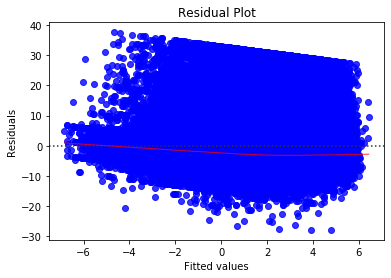

In [214]:
#Make a residual plot with the seaborn package
#Lowess adds a scatter smoother
plot_resid = sns.residplot(regressor_OLS_dep_2.fittedvalues, y_dep_sample['DepDelay'], data=X_dep_sample, 
                          lowess=True, 
                          scatter_kws={'color': 'blue'}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
                          )

plot_resid.axes.set_title('Residual Plot')
plot_resid.axes.set_xlabel('Fitted values')
plot_resid.axes.set_ylabel('Residuals')

plt.show()

##### From the above residual plot, we cannot detect a funnel shape. So, we are good with this assumption.

#### Departure: Multivariate normality

This can be tested in a couple of ways.

1) Histograms - The histograms in the data exploration phase initially did not really show a normal distribution. SO, we fixed them by doing the log transformation.

2) QQ-plot - We can make a QQ-plot of the residuals.

#### Departure: QQ-Plot

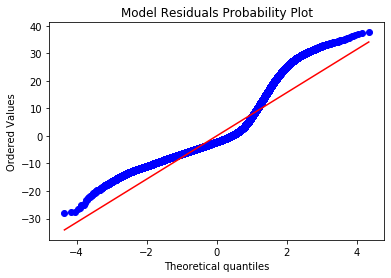

KstestResult(statistic=0.4989032473941305, pvalue=0.0)

In [215]:
#Make a QQ-plot of the residuals
from scipy import stats

stats.probplot(regressor_OLS_dep_2.resid, plot= plt)
plt.title("Model Residuals Probability Plot")
plt.show()

#Do a K-S test
stats.kstest(regressor_OLS_dep.resid, 'norm')

We see that the blue dots are not exactly on the red line, which is an indication of no normal distribution. Finally, we performed Kolmogorov–Smirnov test. We see that the p-value of the K-S test is 0.0 thereby rejecting the null hypothesis of a normal distribution. However, it has been found that when the sample size increases, the normality of the residuals becomes less and less important, because the sampling distributions of the regression coefficients converge on the normal. A good reference for these assumptions is Introductory Econometrics, by Jeffrey M. Wooldridge. Here is a Google Books link:¶

https://books.google.ca/books?hl=en&lr=&id=_9qpCgAAQBAJ&oi=fnd&pg=PR3&dq=wooldridge+econometrics&ots=zwdPb1GsGx&sig=ZykBvLyK-xWojd6j3WAX6wVd5Cw#v=onepage&q=wooldridge%20econometrics&f=false

#### 2) Arrival Delay

In [216]:
import statsmodels.api as sm

X = pd.concat([pd.DataFrame(np.ones((X_arr_sample.shape[0], 1)).astype(int),
                                  index=X_arr_sample.index), X_arr_sample], axis=1)
X.rename(columns={0: 'const'}, inplace=True)

X_opt = X
regressor_OLS_arr = sm.OLS(endog = y_arr_sample, exog = X_opt).fit()
regressor_OLS_arr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     1707.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:30:28   Log-Likelihood:            -3.7485e+05
No. Observations:              100000   AIC:                         7.498e+05
Df Residuals:                   99953   BIC:                         7.502e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                   -10.0843      0.293    -34.461      0.000     -10.658      -9.511
DepDelay                                  7.0793      0.034    210.989      0.000       7.014       7.145
Distance                                 -1.0809      0.043    -24.950      0.000      -1.166      -0.996
TaxiOut                                   5.4515      0.036    150.113      0.000       5.380       5.523
Year_2007                                -0.7892      0.079    -10.047      0.000      -0.943      -0.635
Year_2008                                -0.2266      0.081     -2.808      0.005      -0.385      -0.068
Month_10                                 -0.8364      0.158     -5.292      0.000      -1.146      -0.527
Month_11                                 -1.1735      0.160     -7.342      0.000      -1.487      -0.860
Month_12                                  0.2005      0.162      1.234      0.217      -0.118       0.519
Month_2                                  -0.0099      0.164     -0.061      0.952      -0.331       0.311
Month_3                                  -0.1349      0.158     -0.856      0.392      -0.444       0.174
Month_4                                  -0.2421      0.159     -1.527      0.127      -0.553       0.069
Month_5                                  -0.1676      0.157     -1.065      0.287      -0.476       0.141
Month_6                                  -0.1531      0.161     -0.952      0.341      -0.468       0.162
Month_7                                  -0.9651      0.159     -6.082      0.000      -1.276      -0.654
Month_8                                  -1.4685      0.158     -9.297      0.000      -1.778      -1.159
Month_9                                  -1.9402      0.161    -12.038      0.000      -2.256      -1.624
DayOfWeek_2                               0.0978      0.121      0.811      0.418      -0.139       0.334
DayOfWeek_3                               0.3653      0.121      3.026      0.002       0.129       0.602
DayOfWeek_4                               0.6662      0.120      5.552      0.000       0.431       0.901
DayOfWeek_5                               0.5976      0.121      4.955      0.000       0.361       0.834
DayOfWeek_6                              -0.3834      0.124     -3.091      0.002      -0.626      -0.140
DayOfWeek_7                              -0.2485      0.121     -2.058      0.040      -0.485      -0.012
CRSDepTime_Early Morning (00:00-6:00)     0.5479      0.227      2.413      0.016       0.103       0.993
CRSDepTime_Morning (6:00-12:00)           0.5106      0.092      5.541      0.000       0.330       0.691
CRSArrTime_Early Morning (00:00-6:00)     0.2167      0.230      0.944      0.345      -0.233       0.667
CRSArrTim

##### As we see, we have few variables whose p-values are insignificant and also, they have very low coefficient values. So, we will drop those variables and see if it impacts our R2(0.438).

In [217]:
# Removing variables having less significant p-value and low coefficients
X.drop(['Year_2008','Month_12','Month_2','DayOfWeek_2','DayOfWeek_3','CRSDepTime_Early Morning (00:00-6:00)','CRSArrTime_Early Morning (00:00-6:00)'],axis=1, inplace=True)
X_opt = X
regressor_OLS_arr_1 = sm.OLS(endog = y_arr_sample, exog = X_opt).fit()
regressor_OLS_arr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDelay   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     2013.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:31:07   Log-Likelihood:            -3.7486e+05
No. Observations:              100000   AIC:                         7.498e+05
Df Residuals:                   99960   BIC:                         7.502e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -9.9752      0.267    -37.425      0.000     -10.498      -9.453
DepDelay                            7.0745      0.033    211.203      0.000       7.009       7.140
Distance                           -1.0691      0.043    -24.901      0.000      -1.153      -0.985
TaxiOut                             5.4503      0.036    150.340      0.000       5.379       5.521
Year_2007                          -0.6797      0.069     -9.913      0.000      -0.814      -0.545
Month_10                           -0.9042      0.129     -6.995      0.000      -1.158      -0.651
Month_11                           -1.2320      0.131     -9.374      0.000      -1.490      -0.974
Month_3                            -0.1957      0.129     -1.522      0.128      -0.448       0.056
Month_4                            -0.3064      0.130     -2.361      0.018      -0.561      -0.052
Month_5                            -0.2329      0.128     -1.813      0.070      -0.485       0.019
Month_6                            -0.2167      0.132     -1.637      0.102      -0.476       0.043
Month_7                            -1.0339      0.130     -7.961      0.000      -1.288      -0.779
Month_8                            -1.5248      0.129    -11.814      0.000      -1.778      -1.272
Month_9                            -2.0043      0.133    -15.051      0.000      -2.265      -1.743
DayOfWeek_4                         0.5126      0.098      5.228      0.000       0.320       0.705
DayOfWeek_5                         0.4432      0.099      4.484      0.000       0.249       0.637
DayOfWeek_6                        -0.5328      0.103     -5.175      0.000      -0.735      -0.331
DayOfWeek_7                        -0.4021      0.099     -4.063      0.000      -0.596      -0.208
CRSDepTime_Morning (6:00-12:00)     0.4216      0.086      4.923      0.000       0.254       0.589
CRSArrTime_Morning (6:00-12:00)     0.4223      0.092      4.608      0.000       0.243       0.602
UniqueCarrier_YV                    3.5208      0.133     26.415      0.000       3.260       3.782
Dest_AUS                            2.8670      0.351      8.157      0.000       2.178       3.556
Dest_BOS                            3.1262      0.347      9.010      0.000       2.446       3.806
Dest_CLE                            6.3855      0.294     21.742      0.000       5.810       6.961
Dest_CLT                            7.3431      0.292     25.131      0.000       6.770       7.916
Dest_DEN                            5.4883      0.295     18.616      0.000       4.910       6.066
Dest_EWR                            6.1698      0.269     22.970      0.000       5.643       6.696
Dest_FLL                            1.3429      0.366      3.672      0.000       0

##### R2 value(0.438) is still intact and since, we don't have any less significant variables remaining to remove, so we will stop here and continue with our analysis.

##### Analyzing the performance of our final ML model

1. R2 value = 0.438
2. F-stats = 0.0. The F-test is significant, so this tells us that the predictors are related to the response variables.
3. Durbin-Watson test = 2.0. Autocorrelation can be tested with the Durbin-Watson test. Ideal value should be between 1.5 - 2.5 and our value serves as an indication for no autocorrelation problem.

##### Checking the assumptions of Linear regression

1. The linear relationship betwen predictors and response is already tested by the pair plots in the data exploration part.
2. Multicollinearity is also tested in the data exploration part by plotting correlation matrix. We saw that the correlation between CRSElapsedTime and Distance was high and hence, we removed one of CRSElapsedTime from the dataset. However, a better way to check multicollinearity is to calculate the VIF (variance inflation factor).

#### Arrival: Calculating VIF

In [218]:
vif = pd.DataFrame()
vif_data=X
vif["VIF_Factor"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
vif["features"] = vif_data.columns
vif

,VIF_Factor,features
0,67.271565,const
1,1.066186,DepDelay
2,1.735017,Distance
3,1.255844,TaxiOut
4,1.004353,Year_2007
5,1.251707,Month_10
6,1.241525,Month_11
7,1.253078,Month_3
8,1.247406,Month_4
9,1.254652,Month_5


##### Some of the VIFs of the predictors are above 4. But, since we the coefficients of these variables are extrememly high and they seem very significant, we would not remove them. Removing them is reducing our R2 value.

#### Arrival: Checking Heteroscedasticity

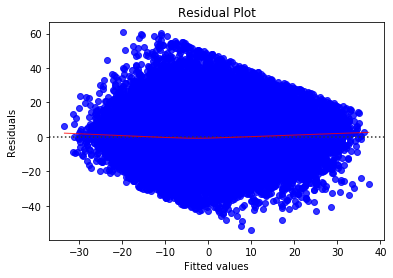

In [219]:
#Make a residual plot with the seaborn package
#Lowess adds a scatter smoother
plot_resid = sns.residplot(regressor_OLS_arr_1.fittedvalues, y_arr_sample['ArrDelay'], data=X_arr_sample, 
                          lowess=True, 
                          scatter_kws={'color': 'blue'}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}
                          )

plot_resid.axes.set_title('Residual Plot')
plot_resid.axes.set_xlabel('Fitted values')
plot_resid.axes.set_ylabel('Residuals')

plt.show()

##### No Heteroscedasticity

#### Arrival: QQ-plot

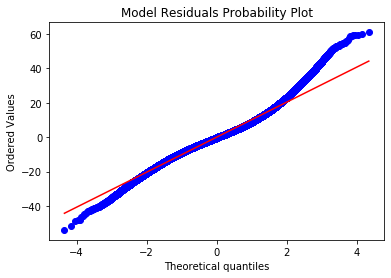

KstestResult(statistic=0.3944934399539364, pvalue=0.0)

In [221]:
#Make a QQ-plot of the residuals
from scipy import stats

stats.probplot(regressor_OLS_arr.resid, plot= plt)
plt.title("Model Residuals Probability Plot")
plt.show()

#Do a K-S test
stats.kstest(regressor_OLS_arr.resid, 'norm')

##### Extreme values seem to get deviated from the straight line as residuals are following a bell curve and straight line just plot the middle values.

#### B4.c Model 3: LASSO Regression

#### 1) Departure Delay

In [225]:
from sklearn.linear_model import Lasso

lassoReg_dep = Lasso(alpha=0.001)

rmse_scores_dep=np.sqrt(-cross_val_score(lassoReg_dep, X_dep_sample, y_dep_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_dep.mean()))

ML RMSE: 8.486115761108323


##### Original RMSE: 8.5. No Improvement

#### 2) Arrival Delay

In [227]:
lassoReg_arr = Lasso(alpha=0.001)

rmse_scores_arr=np.sqrt(-cross_val_score(lassoReg_arr, X_arr_sample, y_arr_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_arr.mean()))

ML RMSE: 10.279235442424508


##### Original RMSE: 10.2. No Improvement

#### B4.d Model 4: Ridge Regression

#### 1) Departure Delay

In [228]:
from sklearn.linear_model import Ridge
ridgeReg_dep = Ridge(alpha=0.01)

rmse_scores_dep=np.sqrt(-cross_val_score(ridgeReg_dep, X_dep_sample, y_dep_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_dep.mean()))

ML RMSE: 8.486061761979432


##### Original RMSE: 8.5. No Improvement

#### 2) Arrival Delay

In [229]:
ridgeReg_arr = Ridge(alpha=0.01)

rmse_scores_arr=np.sqrt(-cross_val_score(ridgeReg_arr, X_arr_sample, y_arr_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_arr.mean()))

ML RMSE: 10.278168523767254


##### Original RMSE: 10.2. No improvement

#### B4.e Model 5: Elastic Net Regression

#### 1) Departure Delay

In [230]:
from sklearn.linear_model import ElasticNet

ENreg_dep = ElasticNet(alpha=0.01, l1_ratio=1)

rmse_scores_dep=np.sqrt(-cross_val_score(ENreg_dep, X_dep_sample, y_dep_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_dep.mean()))

ML RMSE: 8.49159616045522


##### Original RMSE: 8.5. No Improvement

#### 2) Arrival Delay

In [231]:
ENreg_arr = ElasticNet(alpha=0.01, l1_ratio=1)

rmse_scores_arr=np.sqrt(-cross_val_score(ENreg_arr, X_arr_sample, y_arr_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_arr.mean()))

ML RMSE: 10.289517392332504


##### Original RMSE: 10.2. No improvement

#### B4.f Model 6.Decision Trees

#### 1) Departure Delay

In [232]:
from sklearn.tree import DecisionTreeRegressor 

dep_tree = DecisionTreeRegressor(criterion='mse', max_depth=10)

rmse_scores_dep=np.sqrt(-cross_val_score(dep_tree, X_dep_sample, y_dep_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_dep.mean()))

ML RMSE: 8.548423055277496


##### Tried with below max_depth. 10 works best.
* max_depth=3 - 8.6
* max_depth=10 - 8.5
* max_depth=50 - 11.3

#### 2) Arrival Delay

In [234]:
arr_tree = DecisionTreeRegressor(criterion='mse', max_depth=10)

rmse_scores_arr=np.sqrt(-cross_val_score(arr_tree, X_arr_sample, y_arr_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_arr.mean()))

ML RMSE: 10.450116883369663


##### Tried with below max_depth. 10 works best.
* max_depth=3 - 11.1
* max_depth=10 - 10.5
* max_depth=50 - 14.1

#### B4.g Model 7: Random Forest Regressor

#### 1) Departure Delay

In [235]:
from sklearn.ensemble import RandomForestRegressor

rf_dep = RandomForestRegressor(n_estimators = 10, random_state = 42)

rmse_scores_dep=np.sqrt(-cross_val_score(rf_dep, X_dep_sample, y_dep_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_dep.mean()))

ML RMSE: 9.548255212244282


##### Tried with below estimators. 100 works best. But still performing worse then MLR
* 10 - 9.5
* 50 - 9.29
* 100 - 9.27

#### 2) Arrival Delay

In [236]:
rf_arr = RandomForestRegressor(n_estimators = 50, random_state = 42)

rmse_scores_arr=np.sqrt(-cross_val_score(rf_arr, X_arr_sample, y_arr_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_arr.mean()))

ML RMSE: 10.112194476393729


##### Tried with below estimators. 100 works best, rather slighly better than MLR(RMSE: 10.2)
* 100 - 10.05
* 50 - 10.09
* 10 - 10.47

#### B4.h Model 8: Support Vector regression

#### 1) Departure Delay

In [237]:
from sklearn.svm import SVR

svr_dep = SVR(gamma='auto')
rmse_scores_dep=np.sqrt(-cross_val_score(svr_dep, X_dep_sample, y_dep_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_dep.mean()))

ML RMSE: 8.778075421396247


##### Bad Performer

#### 2) Arrival Delay

In [238]:
svr_arr = SVR(gamma='auto')

rmse_scores_arr=np.sqrt(-cross_val_score(svr_arr, X_arr_sample, y_arr_sample, cv=5, scoring='neg_mean_squared_error'))
print ("ML RMSE: {}".format(rmse_scores_arr.mean()))

ML RMSE: 10.074013694661868


##### Not a better performer than Linear Regression. Almost same RMSE.

## Conclusion on Delay Prediction

Following algorithms were applied to predict Departure and Arrival Delays:

* Multiple linear Regression
* PCA + Multiple linear Regression
* Lasso Regression
* Ridge Regression
* Elastic Net Regression
* Decision Trees
* Random Forest Regressor
* Support Vector Regressor
Based on the results, it was found that Multiple Linear Regression works best with Departure Delay RMSE: 8.5 and Arrival Delay RMSE: 10.2. Results are not only based on RMSE values but also on the computational complexity and Linear regression serves the least computational complexity amongst all.